# Feature engineering

In [1]:
%load_ext autoreload
%autoreload 2

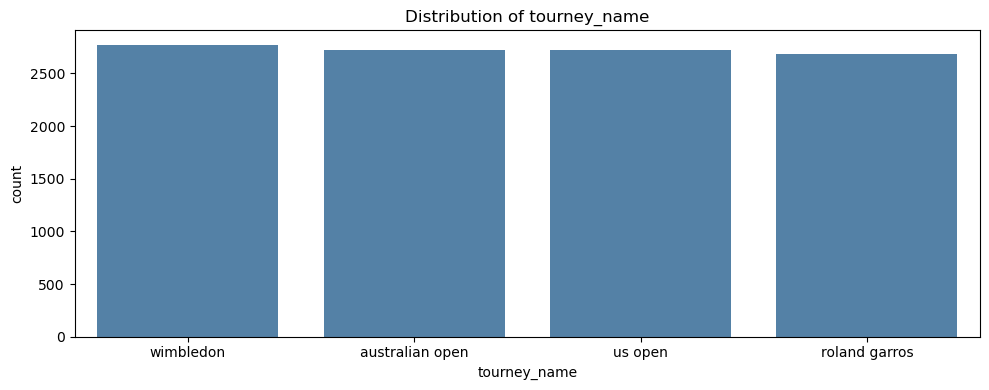

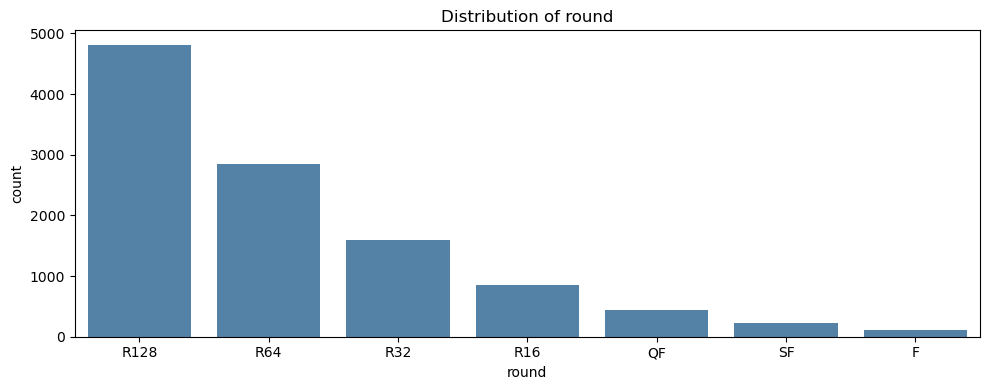

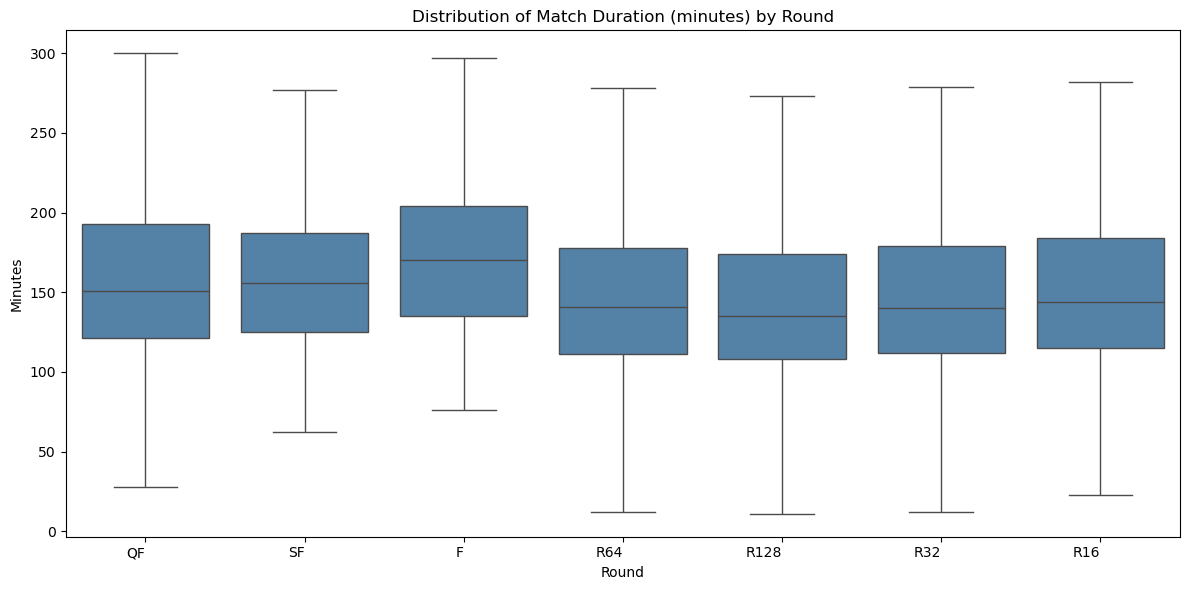

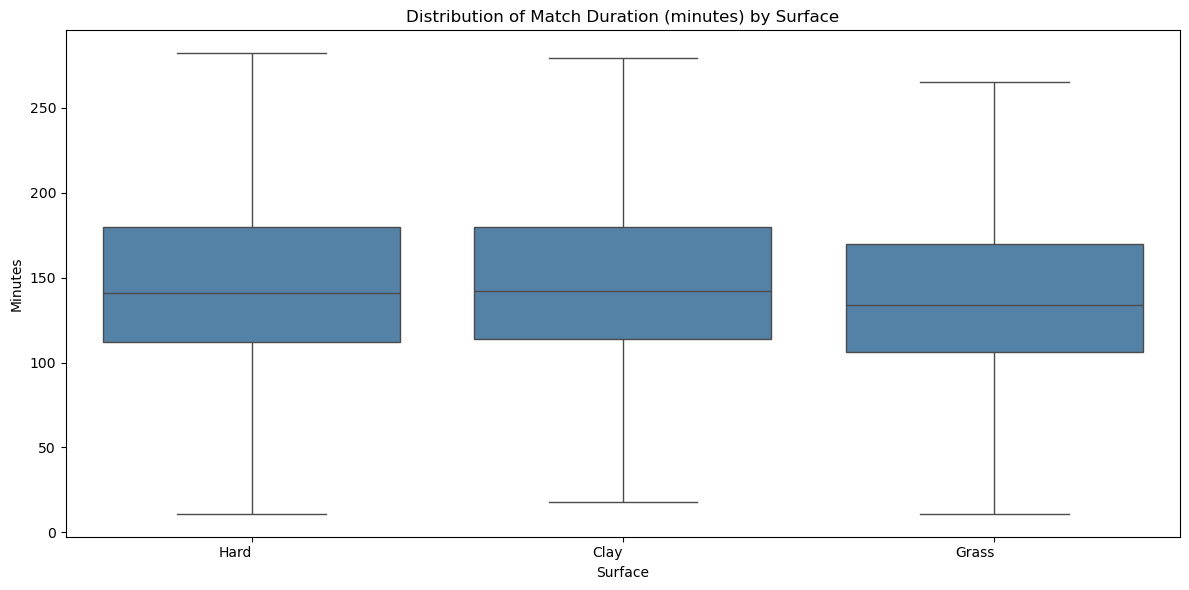

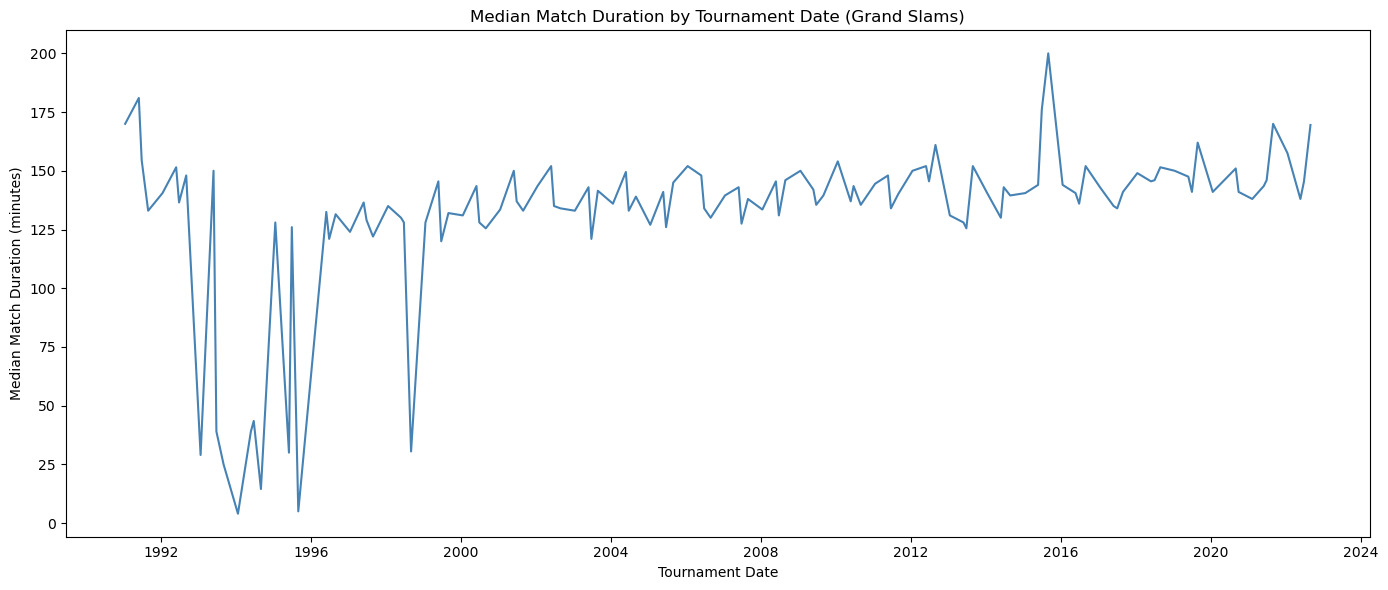

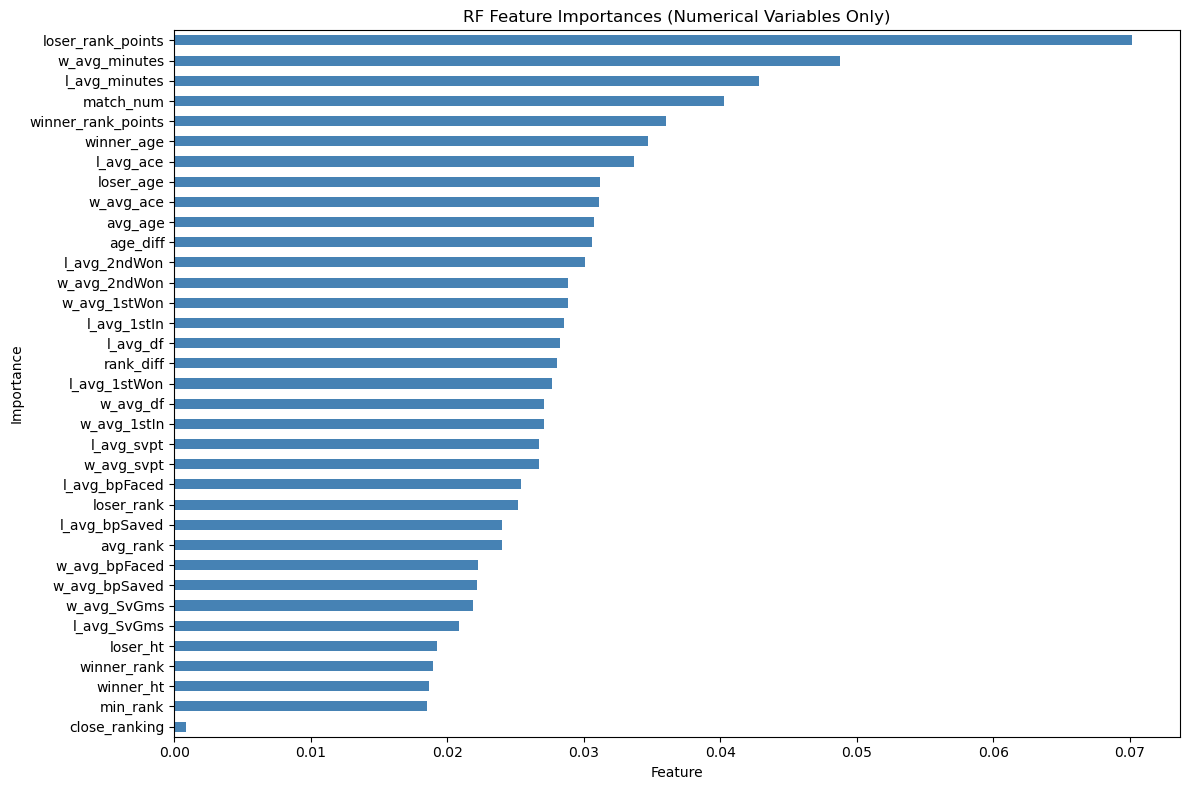


📊 VIF Scores (Numerical Features Only):
               feature          VIF
13             avg_age          inf
2           winner_age          inf
4            loser_age          inf
5          winner_rank          inf
7           loser_rank          inf
9            rank_diff          inf
10            avg_rank          inf
11            min_rank          inf
0                const  2368.444407
17          w_avg_svpt    88.948554
27          l_avg_svpt    83.335360
29        l_avg_1stWon    64.619216
23       w_avg_bpFaced    62.546889
19        w_avg_1stWon    58.613461
33       l_avg_bpFaced    58.386449
18         w_avg_1stIn    33.006886
28         l_avg_1stIn    30.999727
22       w_avg_bpSaved    26.709071
32       l_avg_bpSaved    26.609207
30        l_avg_2ndWon    19.270185
20        w_avg_2ndWon    18.378051
31         l_avg_SvGms    18.088745
21         w_avg_SvGms    16.302974
35   round_group_Other     7.723612
36      round_group_QF     5.081065
34       l_avg_minutes 

In [ ]:
from limpieza_with_min import main
file_path = "../atp_data/atp_matches_till_2022.csv"
final_data = main(file_path, show_plots=True)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from scipy import stats
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

df = pd.read_csv('../atp_data/final_tennis_data.csv')
display(df.head())
sorted(df.columns)
df_clean = df.copy()


winner_ht  loser_ht  winner_rank_points  loser_rank_points  age_diff  \
0      188.0     170.0              3889.0              420.0       1.7   
1      188.0     180.0              2541.0              553.0       4.2   
2      183.0     178.0               303.0              345.0       3.9   
3      190.0     190.0              3528.0             1229.0       2.9   
4      188.0     188.0              2541.0             3889.0       5.9   

   close_ranking  w_avg_ace  w_avg_df  w_avg_minutes  l_avg_ace  l_avg_df  \
0              0       4.00      4.50         143.25       2.75      2.50   
1              0       5.25      3.00         121.50       3.00      2.50   
2              1       3.75      5.75         165.50       5.25      5.50   
3              1       5.75      1.25         176.75       7.50      1.25   
4              1       6.00      2.80         126.60       3.60      4.40   

   l_avg_minutes  surface_Grass  surface_Hard  round_group_Other  \
0         136.50            0.0           1.0                0.0   
1         118.75            0.0           1.0                0.0   
2         180.00            0.0           1.0                0.0   
3         158.75            0.0           1.0                0.0   
4         132.20            0.0           1.0                0.0   

   round_group_QF  round_group_SF  minutes  
0             1.0             0.0     88.0  
1             1.0             0.0    147.0  
2             1.0             0.0    204.0  
3             1.0             0.0    111.0  
4             0.0             1.0    242.0

# Regresion lineal

Starting Tennis Match Duration Analysis...
Dataset shape: (10746, 18)
Target variable (minutes) - Mean: 145.48, Std: 46.28
=== LINEAR REGRESSION MODELS COMPARISON ===


--- Model 1 - Basic ---
Features: 7
Train R²: 0.0477
Test R²: 0.0377
Train RMSE: 45.20
Test RMSE: 45.21
Train MAE: 36.62
Test MAE: 36.59

--- Model 2 - With Player Stats ---
Features: 11
Train R²: 0.0506
Test R²: 0.0419
Train RMSE: 45.13
Test RMSE: 45.11
Train MAE: 36.54
Test MAE: 36.53

--- Model 3 - With Historical Minutes ---
Features: 9
Train R²: 0.0613
Test R²: 0.0518
Train RMSE: 44.88
Test RMSE: 44.88
Train MAE: 36.37
Test MAE: 36.25

--- Model 4 - Full Model ---
Features: 14
Train R²: 0.0644
Test R²: 0.0550
Train RMSE: 44.80
Test RMSE: 44.80
Train MAE: 36.28
Test MAE: 36.19


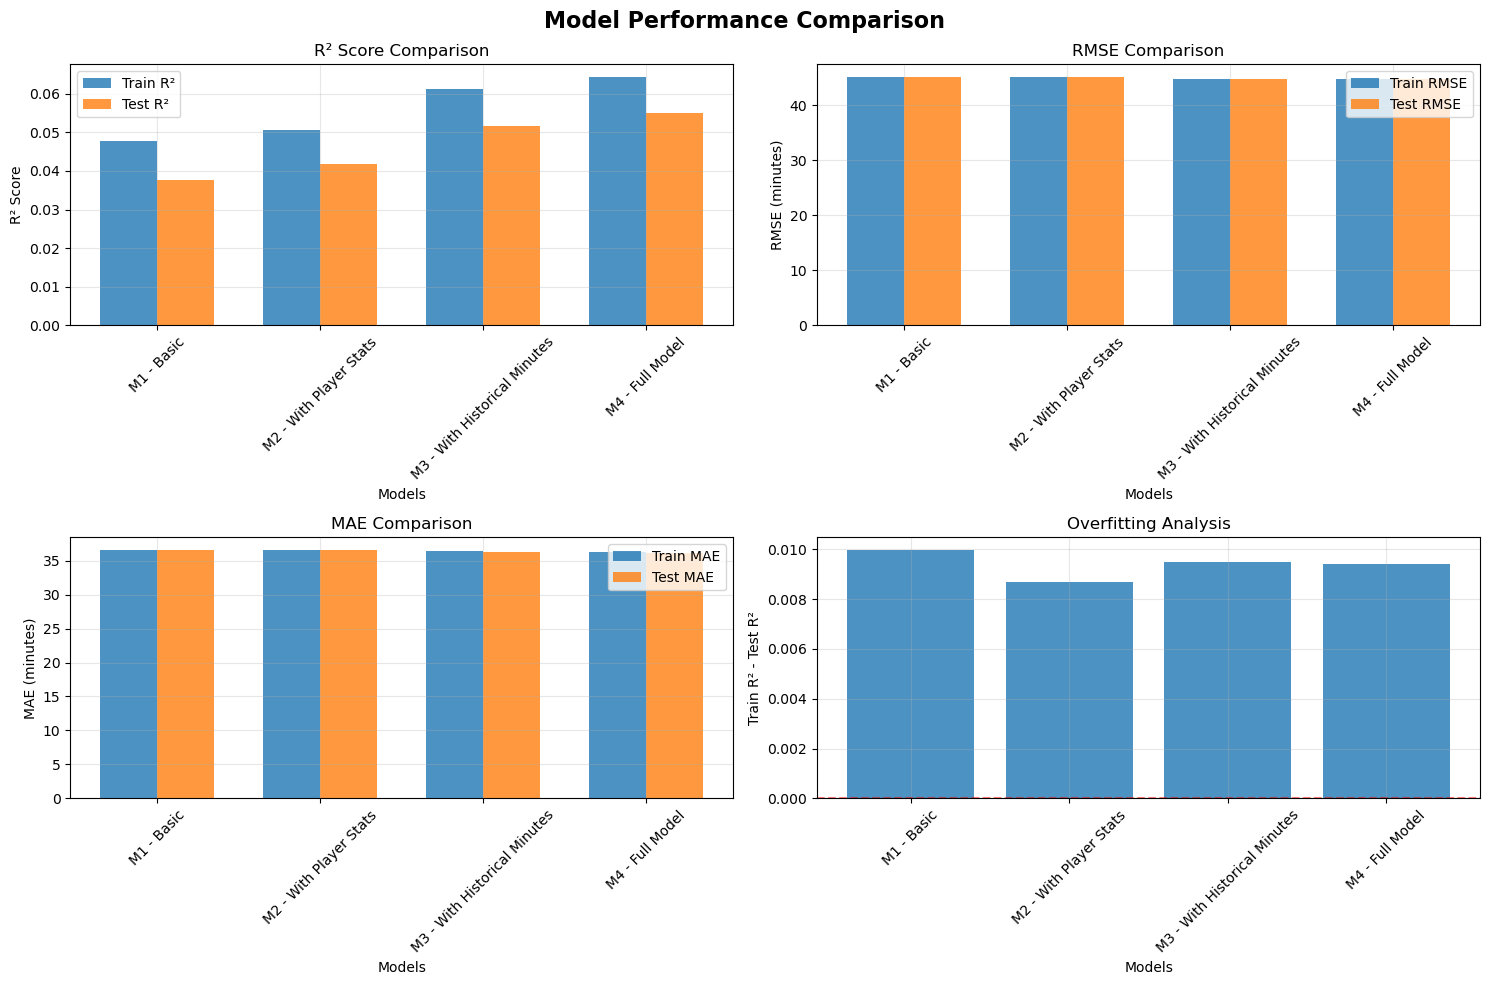


BEST MODEL SUMMARY
Model: Model 4 - Full Model
Test R²: 0.0550
Test RMSE: 44.80 minutes
Test MAE: 36.19 minutes
Number of features: 14

Features used:
 1. age_diff
 2. round_group_QF
 3. round_group_SF
 4. round_group_Other
 5. surface_Grass
 6. surface_Hard
 7. winner_rank_points
 8. loser_rank_points
 9. w_avg_ace
10. w_avg_df
11. w_avg_minutes
12. l_avg_ace
13. l_avg_df
14. l_avg_minutes

DETAILED ANALYSIS FOR ALL MODELS

Generating detailed analysis for: Model 1 - Basic


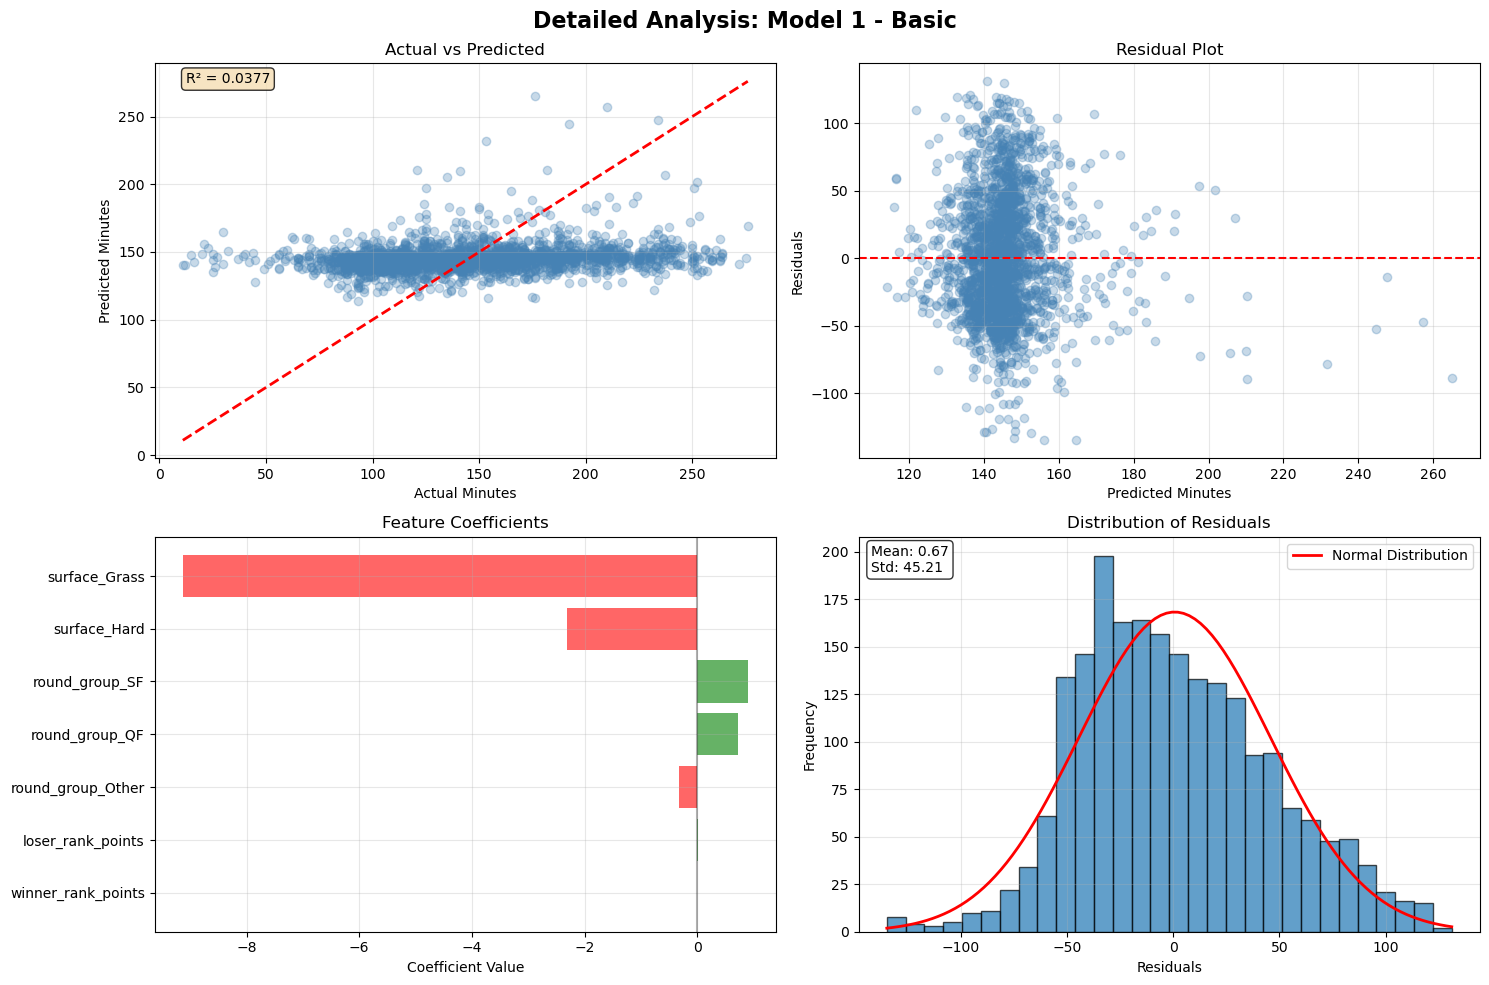


📊 Model 1 - Basic Summary:
   • Test R²: 0.0377
   • Test RMSE: 45.21 minutes
   • Test MAE: 36.59 minutes
   • Number of features: 7
   • Top 3 most influential features:
     1. surface_Grass: decreases match duration by 9.13 min per unit
     2. surface_Hard: decreases match duration by 2.31 min per unit
     3. round_group_SF: increases match duration by 0.90 min per unit
--------------------------------------------------

Generating detailed analysis for: Model 2 - With Player Stats


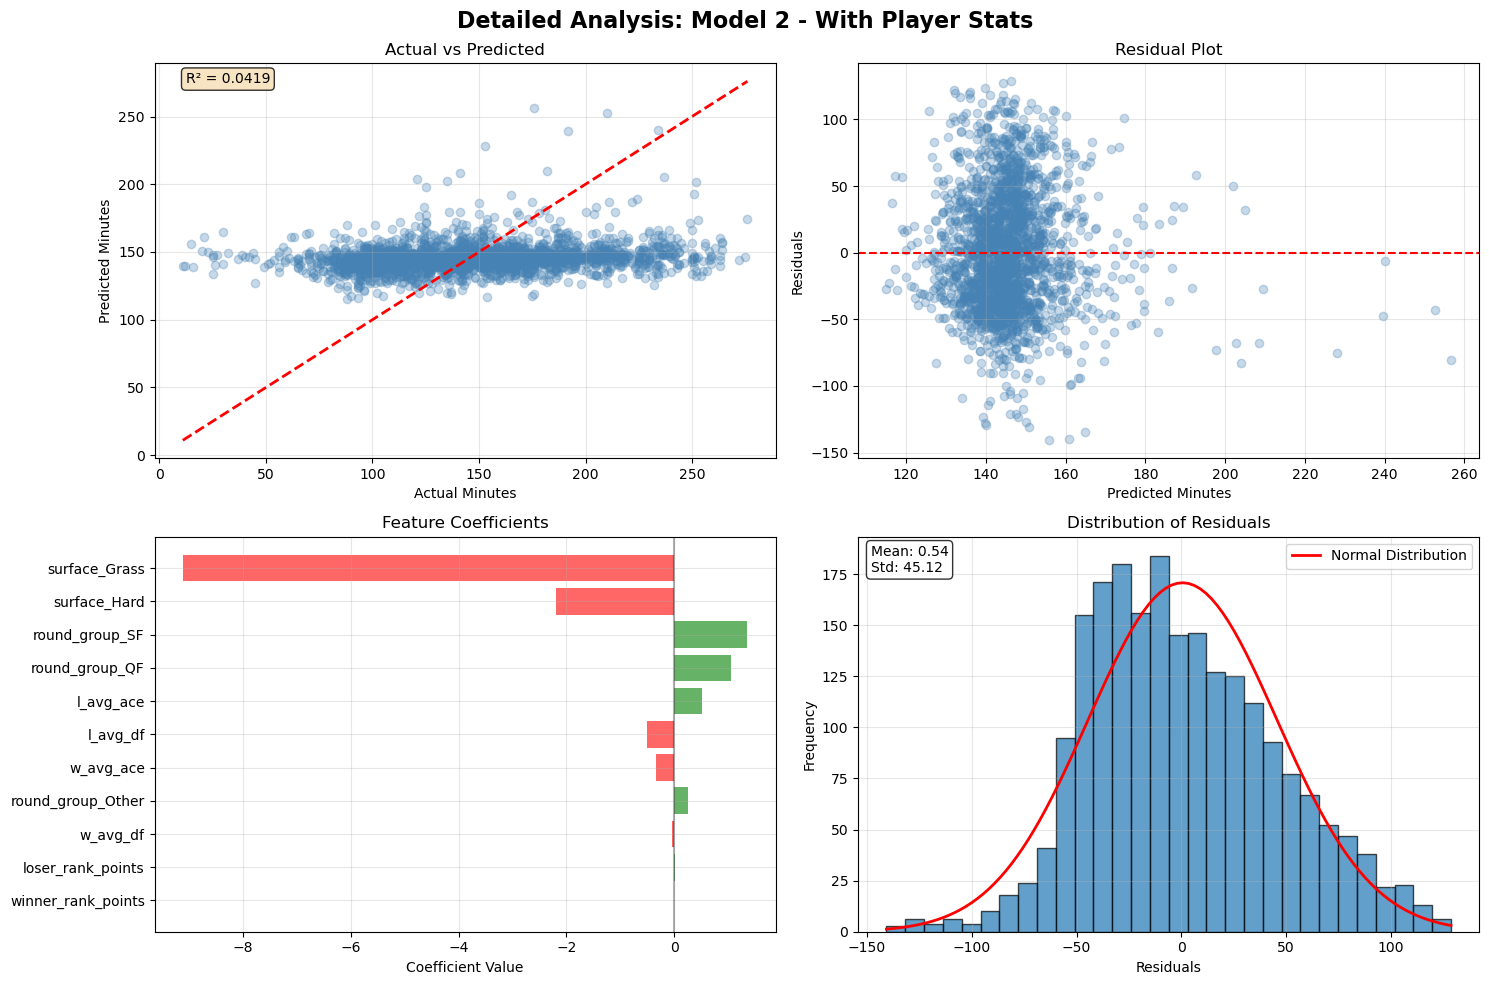


📊 Model 2 - With Player Stats Summary:
   • Test R²: 0.0419
   • Test RMSE: 45.11 minutes
   • Test MAE: 36.53 minutes
   • Number of features: 11
   • Top 3 most influential features:
     1. surface_Grass: decreases match duration by 9.12 min per unit
     2. surface_Hard: decreases match duration by 2.20 min per unit
     3. round_group_SF: increases match duration by 1.36 min per unit
--------------------------------------------------

Generating detailed analysis for: Model 3 - With Historical Minutes


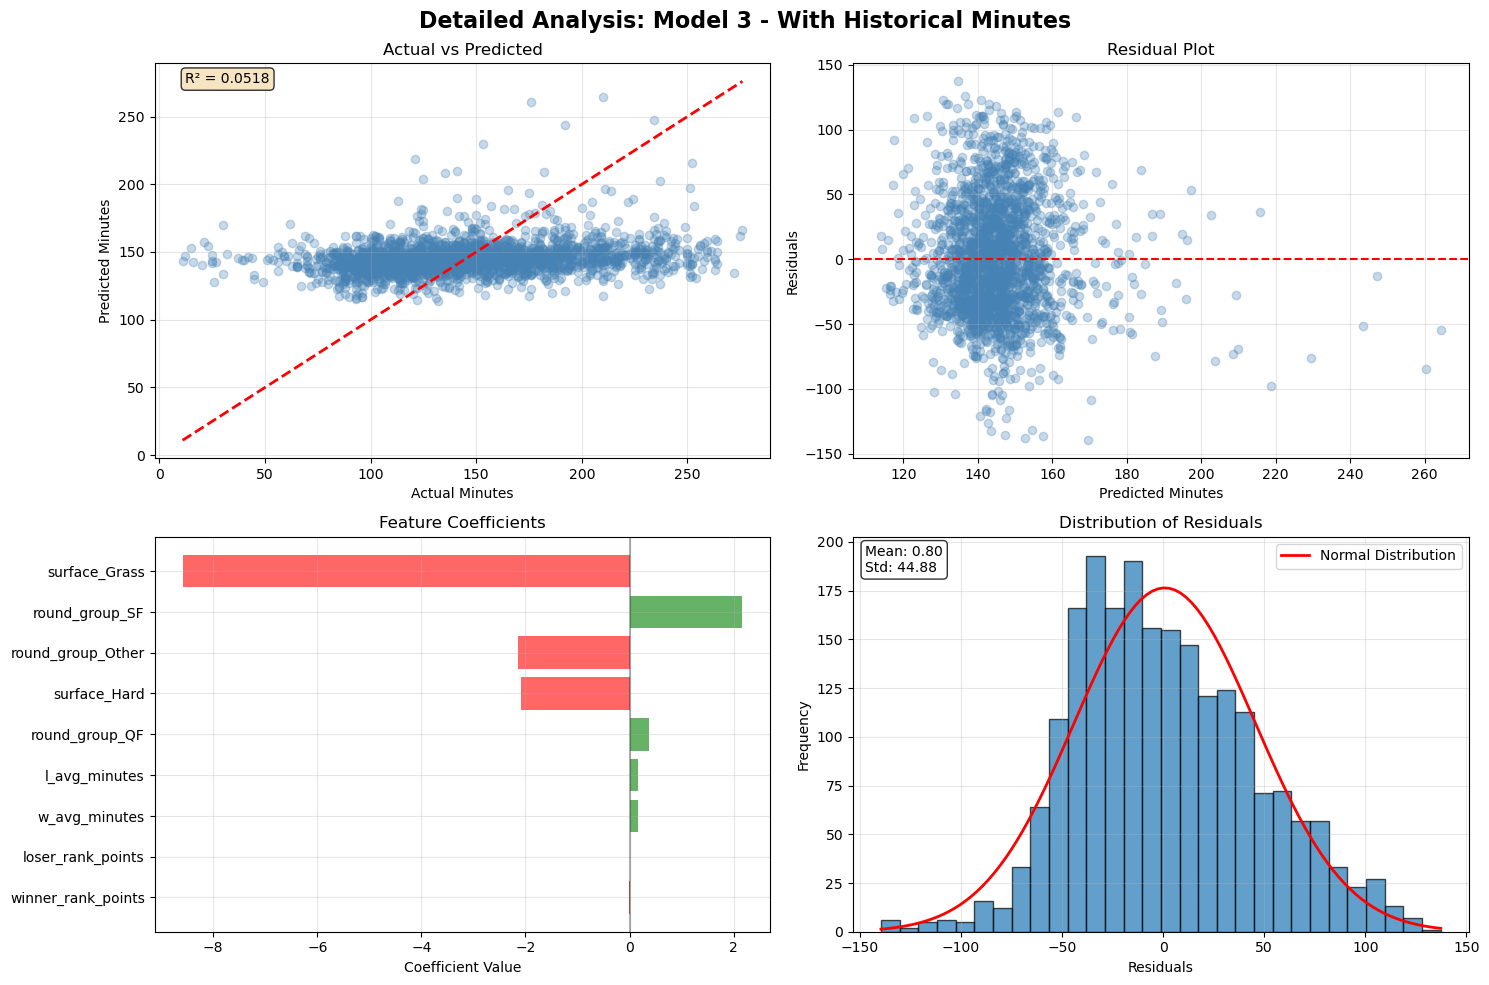


📊 Model 3 - With Historical Minutes Summary:
   • Test R²: 0.0518
   • Test RMSE: 44.88 minutes
   • Test MAE: 36.25 minutes
   • Number of features: 9
   • Top 3 most influential features:
     1. surface_Grass: decreases match duration by 8.59 min per unit
     2. round_group_SF: increases match duration by 2.17 min per unit
     3. round_group_Other: decreases match duration by 2.14 min per unit
--------------------------------------------------

Generating detailed analysis for: Model 4 - Full Model


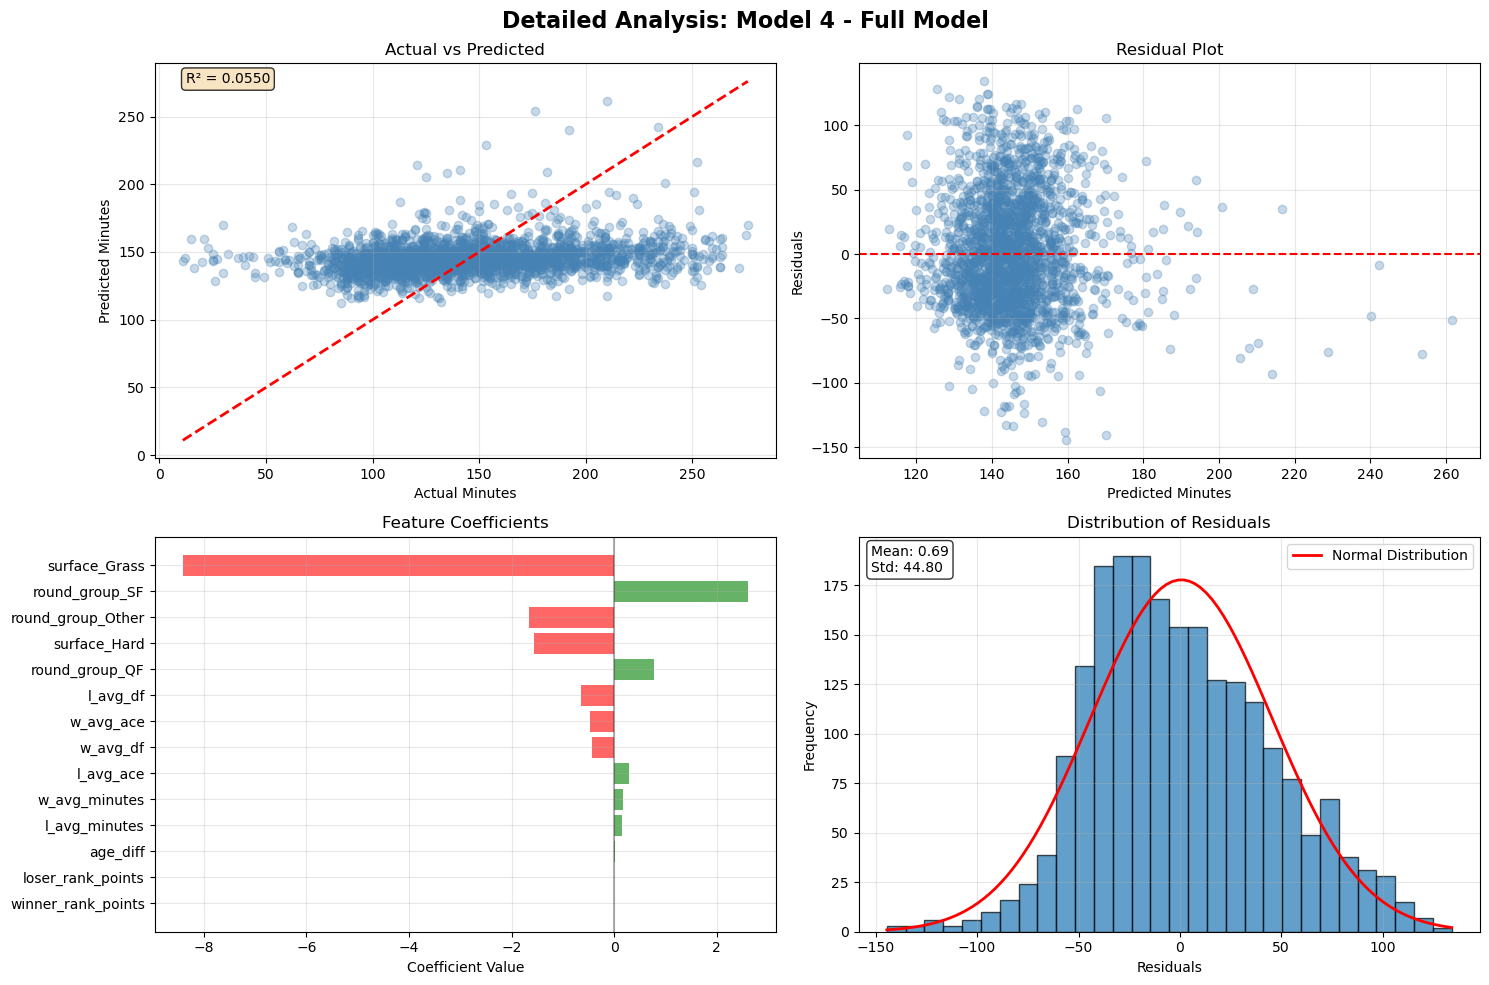


📊 Model 4 - Full Model Summary:
   • Test R²: 0.0550
   • Test RMSE: 44.80 minutes
   • Test MAE: 36.19 minutes
   • Number of features: 14
   • Top 3 most influential features:
     1. surface_Grass: decreases match duration by 8.41 min per unit
     2. round_group_SF: increases match duration by 2.61 min per unit
     3. round_group_Other: decreases match duration by 1.66 min per unit
--------------------------------------------------


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
#sns.set_palette("husl")

# Assuming df_clean is your DataFrame
# df_clean = your_dataframe_here

def create_regression_models(df):
    """
    Create and compare multiple linear regression models
    """
    
    # Define different feature sets
    models = {
        'Model 1 - Basic': ['round_group_QF', 'round_group_SF', 'round_group_Other', 
                           'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points'],
        
        'Model 2 - With Player Stats': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                       'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                       'loser_rank_points', 'w_avg_ace', 'w_avg_df', 'l_avg_ace', 'l_avg_df'],
        
        'Model 3 - With Historical Minutes': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                            'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                            'loser_rank_points', 'w_avg_minutes', 'l_avg_minutes'],
        
        'Model 4 - Full Model': ['age_diff', 'round_group_QF', 'round_group_SF', 'round_group_Other',
                                'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points',
                                'w_avg_ace', 'w_avg_df', 'w_avg_minutes', 'l_avg_ace', 'l_avg_df', 'l_avg_minutes']
    }
    
    # Target variable
    y = df['minutes']
    
    # Store results
    results = {}
    trained_models = {}
    test_data = {}  # Store test data for each model
    
    # Split data once for consistent comparison using the basic model features
    X_basic = df[models['Model 1 - Basic']]
    _, _, _, y_test = train_test_split(X_basic, y, test_size=0.2, random_state=42)
    
    print("=== LINEAR REGRESSION MODELS COMPARISON ===\n")
    
    for model_name, features in models.items():
        print(f"\n--- {model_name} ---")
        print(f"Features: {len(features)}")
        
        # Prepare data for this specific model
        X = df[features]
        X_train, X_test, y_train_model, y_test_model = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Store test data for later use
        test_data[model_name] = {'X_test': X_test, 'y_test': y_test_model}
        
        # Create and train model
        model = LinearRegression()
        model.fit(X_train, y_train_model)
        
        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Metrics
        train_r2 = r2_score(y_train_model, y_pred_train)
        test_r2 = r2_score(y_test_model, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
        train_mae = mean_absolute_error(y_train_model, y_pred_train)
        test_mae = mean_absolute_error(y_test_model, y_pred_test)
        
        # Store results
        results[model_name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'features': features,
            'coefficients': model.coef_,
            'intercept': model.intercept_
        }
        
        trained_models[model_name] = model
        
        print(f"Train R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")
    
    return results, trained_models, test_data

def plot_model_comparison(results):
    """
    Create comparison plots for all models
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
    
    models = list(results.keys())
    
    # R² comparison
    train_r2 = [results[model]['train_r2'] for model in models]
    test_r2 = [results[model]['test_r2'] for model in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[0,0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8,color = 'C0')
    axes[0,0].bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8, color = 'C1')
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_title('R² Score Comparison')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels([m.replace('Model ', 'M') for m in models], rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # RMSE comparison
    train_rmse = [results[model]['train_rmse'] for model in models]
    test_rmse = [results[model]['test_rmse'] for model in models]
    
    axes[0,1].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8, color = 'C0')
    axes[0,1].bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8, color = 'C1')
    axes[0,1].set_xlabel('Models')
    axes[0,1].set_ylabel('RMSE (minutes)')
    axes[0,1].set_title('RMSE Comparison')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels([m.replace('Model ', 'M') for m in models], rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # MAE comparison
    train_mae = [results[model]['train_mae'] for model in models]
    test_mae = [results[model]['test_mae'] for model in models]
    
    axes[1,0].bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.8, color = 'C0')
    axes[1,0].bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.8, color = 'C1')
    axes[1,0].set_xlabel('Models')
    axes[1,0].set_ylabel('MAE (minutes)')
    axes[1,0].set_title('MAE Comparison')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels([m.replace('Model ', 'M') for m in models], rotation=45)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Overfitting analysis (Train R² - Test R²)
    overfitting = [results[model]['train_r2'] - results[model]['test_r2'] for model in models]
    
    axes[1,1].bar(models, overfitting, alpha=0.8, color='C0')
    axes[1,1].set_xlabel('Models')
    axes[1,1].set_ylabel('Train R² - Test R²')
    axes[1,1].set_title('Overfitting Analysis')
    axes[1,1].set_xticklabels([m.replace('Model ', 'M') for m in models], rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

def plot_detailed_model_analysis(model_name, results, trained_models, test_data, df):
    """
    Detailed analysis of a specific model
    """
    
    model = trained_models[model_name]
    features = results[model_name]['features']
    
    # Get the correct test data for this model
    X_test = test_data[model_name]['X_test']
    y_test = test_data[model_name]['y_test']
    
    # Predictions
    y_pred = model.predict(X_test)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Detailed Analysis: {model_name}', fontsize=16, fontweight='bold')
    
    # Actual vs Predicted
    axes[0,0].scatter(y_test, y_pred, alpha=0.3, color='steelblue')
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Minutes')
    axes[0,0].set_ylabel('Predicted Minutes')
    axes[0,0].set_title('Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add R² to the plot
    r2 = r2_score(y_test, y_pred)
    axes[0,0].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[0,0].transAxes, 
                   bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # Residuals
    residuals = y_test - y_pred
    axes[0,1].scatter(y_pred, residuals, alpha=0.3, color='steelblue')
    axes[0,1].axhline(y=0, color='r', linestyle='--')
    axes[0,1].set_xlabel('Predicted Minutes')
    axes[0,1].set_ylabel('Residuals')
    axes[0,1].set_title('Residual Plot')
    axes[0,1].grid(True, alpha=0.3)
    
    # Feature importance (coefficients)
    coef_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    # Color bars based on positive/negative coefficients
    colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
    axes[1,0].barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.6)
    axes[1,0].set_xlabel('Coefficient Value')
    axes[1,0].set_title('Feature Coefficients')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Distribution of residuals
    axes[1,1].hist(residuals, bins=30, alpha=0.7, edgecolor='black', color='C0')
    axes[1,1].set_xlabel('Residuals')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Distribution of Residuals')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add normal distribution overlay
    mu, sigma = residuals.mean(), residuals.std()
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[1,1].plot(x, len(residuals) * (residuals.max() - residuals.min()) / 30 * 
                   (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2),
                   'r-', linewidth=2, label='Normal Distribution')
    axes[1,1].legend()
    
    # Add residual statistics
    axes[1,1].text(0.02, 0.98, f'Mean: {mu:.2f}\nStd: {sigma:.2f}', 
                   transform=axes[1,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_all_models_detailed_analysis(results, trained_models, test_data, df):
    """
    Show detailed analysis for all models
    """
    print("\n" + "="*60)
    print("DETAILED ANALYSIS FOR ALL MODELS")
    print("="*60)
    
    for model_name in results.keys():
        print(f"\nGenerating detailed analysis for: {model_name}")
        plot_detailed_model_analysis(model_name, results, trained_models, test_data, df)
        
        # Print model summary
        model_results = results[model_name]
        print(f"\n📊 {model_name} Summary:")
        print(f"   • Test R²: {model_results['test_r2']:.4f}")
        print(f"   • Test RMSE: {model_results['test_rmse']:.2f} minutes")
        print(f"   • Test MAE: {model_results['test_mae']:.2f} minutes")
        print(f"   • Number of features: {len(model_results['features'])}")
        
        # Show top 3 most important features (by absolute coefficient value)
        coef_df = pd.DataFrame({
            'Feature': model_results['features'],
            'Coefficient': model_results['coefficients']
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        print(f"   • Top 3 most influential features:")
        for i, (_, row) in enumerate(coef_df.head(3).iterrows(), 1):
            direction = "increases" if row['Coefficient'] > 0 else "decreases"
            print(f"     {i}. {row['Feature']}: {direction} match duration by {abs(row['Coefficient']):.2f} min per unit")
        
        print("-" * 50)

def print_best_model_summary(results):
    """
    Print summary of the best model
    """
    
    # Find best model based on test R²
    best_model = max(results.items(), key=lambda x: x[1]['test_r2'])
    best_name, best_metrics = best_model
    
    print("\n" + "="*50)
    print("BEST MODEL SUMMARY")
    print("="*50)
    print(f"Model: {best_name}")
    print(f"Test R²: {best_metrics['test_r2']:.4f}")
    print(f"Test RMSE: {best_metrics['test_rmse']:.2f} minutes")
    print(f"Test MAE: {best_metrics['test_mae']:.2f} minutes")
    print(f"Number of features: {len(best_metrics['features'])}")
    
    print(f"\nFeatures used:")
    for i, feature in enumerate(best_metrics['features'], 1):
        print(f"{i:2d}. {feature}")
    
    return best_name

def run_complete_analysis(df):
    """
    Run the complete regression analysis
    """
    
    print("Starting Tennis Match Duration Analysis...")
    print(f"Dataset shape: {df.shape}")
    print(f"Target variable (minutes) - Mean: {df['minutes'].mean():.2f}, Std: {df['minutes'].std():.2f}")
    
    # Run all models
    results, trained_models, test_data = create_regression_models(df)
    
    # Plot comparison
    plot_model_comparison(results)
    
    # Find and print best model summary
    best_model_name = print_best_model_summary(results)
    
    # Detailed analysis of ALL models
    plot_all_models_detailed_analysis(results, trained_models, test_data, df)
    
    return results, trained_models

def run_analysis_single_model(df, model_name=None):
    """
    Run analysis for a single specific model
    """
    
    # Run all models first
    results, trained_models, test_data = create_regression_models(df)
    
    if model_name is None:
        # Show available models
        print("Available models:")
        for i, name in enumerate(results.keys(), 1):
            print(f"{i}. {name}")
        return results, trained_models
    
    if model_name in results:
        print(f"\n=== DETAILED ANALYSIS FOR {model_name} ===")
        plot_detailed_model_analysis(model_name, results, trained_models, test_data, df)
        
        # Print detailed coefficient analysis
        model_results = results[model_name]
        print(f"\n📊 Detailed Coefficient Analysis for {model_name}:")
        print("-" * 60)
        
        coef_df = pd.DataFrame({
            'Feature': model_results['features'],
            'Coefficient': model_results['coefficients']
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        for _, row in coef_df.iterrows():
            direction = "increases" if row['Coefficient'] > 0 else "decreases"
            print(f"• {row['Feature']:<25}: {direction} duration by {abs(row['Coefficient']):6.2f} minutes per unit")
        
    else:
        print(f"Model '{model_name}' not found. Available models: {list(results.keys())}")
    
    return results, trained_models

# Example usage:
# Uncomment the following lines and replace 'df_clean' with your actual DataFrame

# OPTION 1: Complete analysis with ALL models detailed analysis
results, models = run_complete_analysis(df_clean)

# OPTION 2: Analysis for a specific model only
# results, models = run_analysis_single_model(df_clean, 'Model 4 - Full Model')

# OPTION 3: See available models and choose one
# results, models = run_analysis_single_model(df_clean)

# print("Code is ready! Choose one of these options:")
# print("\n🔍 OPTION 1 - Complete Analysis (ALL models with detailed plots):")
# print("results, models = run_complete_analysis(df_clean)")

# print("\n🎯 OPTION 2 - Single Model Analysis:")
# print("results, models = run_analysis_single_model(df_clean, 'Model 1 - Basic')")

# print("\n📋 OPTION 3 - List available models:")
# print("results, models = run_analysis_single_model(df_clean)")

# print("\n💡 Available model names:")
# print("• 'Model 1 - Basic'")
# print("• 'Model 2 - With Player Stats'") 
# print("• 'Model 3 - With Historical Minutes'")
# print("• 'Model 4 - Full Model'")

🚀 XGBoost Analysis Code is ready! Choose one of these options:

🔍 OPTION 1 - Complete XGBoost Analysis (ALL models with detailed plots):
xgb_results, xgb_models = run_complete_xgboost_analysis(df_clean)

🎯 OPTION 2 - Single XGBoost Model Analysis:
xgb_results, xgb_models = run_xgboost_analysis_single_model(df_clean, 'XGB Model 4 - Full Model')

📋 OPTION 3 - List available XGBoost models:
xgb_results, xgb_models = run_xgboost_analysis_single_model(df_clean)

🆚 OPTION 4 - Compare Linear Regression vs XGBoost:
# First run both analyses, then:
compare_linear_vs_xgboost(df_clean, linear_results, xgb_results)

💡 Available XGBoost model names:
• 'XGB Model 1 - Basic'
• 'XGB Model 2 - With Player Stats'
• 'XGB Model 3 - With Historical Minutes'
• 'XGB Model 4 - Full Model'
Starting Tennis Match Duration XGBoost Analysis...
Dataset shape: (10746, 18)
Target variable (minutes) - Mean: 145.48, Std: 46.28
=== XGBOOST REGRESSION MODELS COMPARISON ===


--- XGB Model 1 - Basic ---
Features: 7
Train 

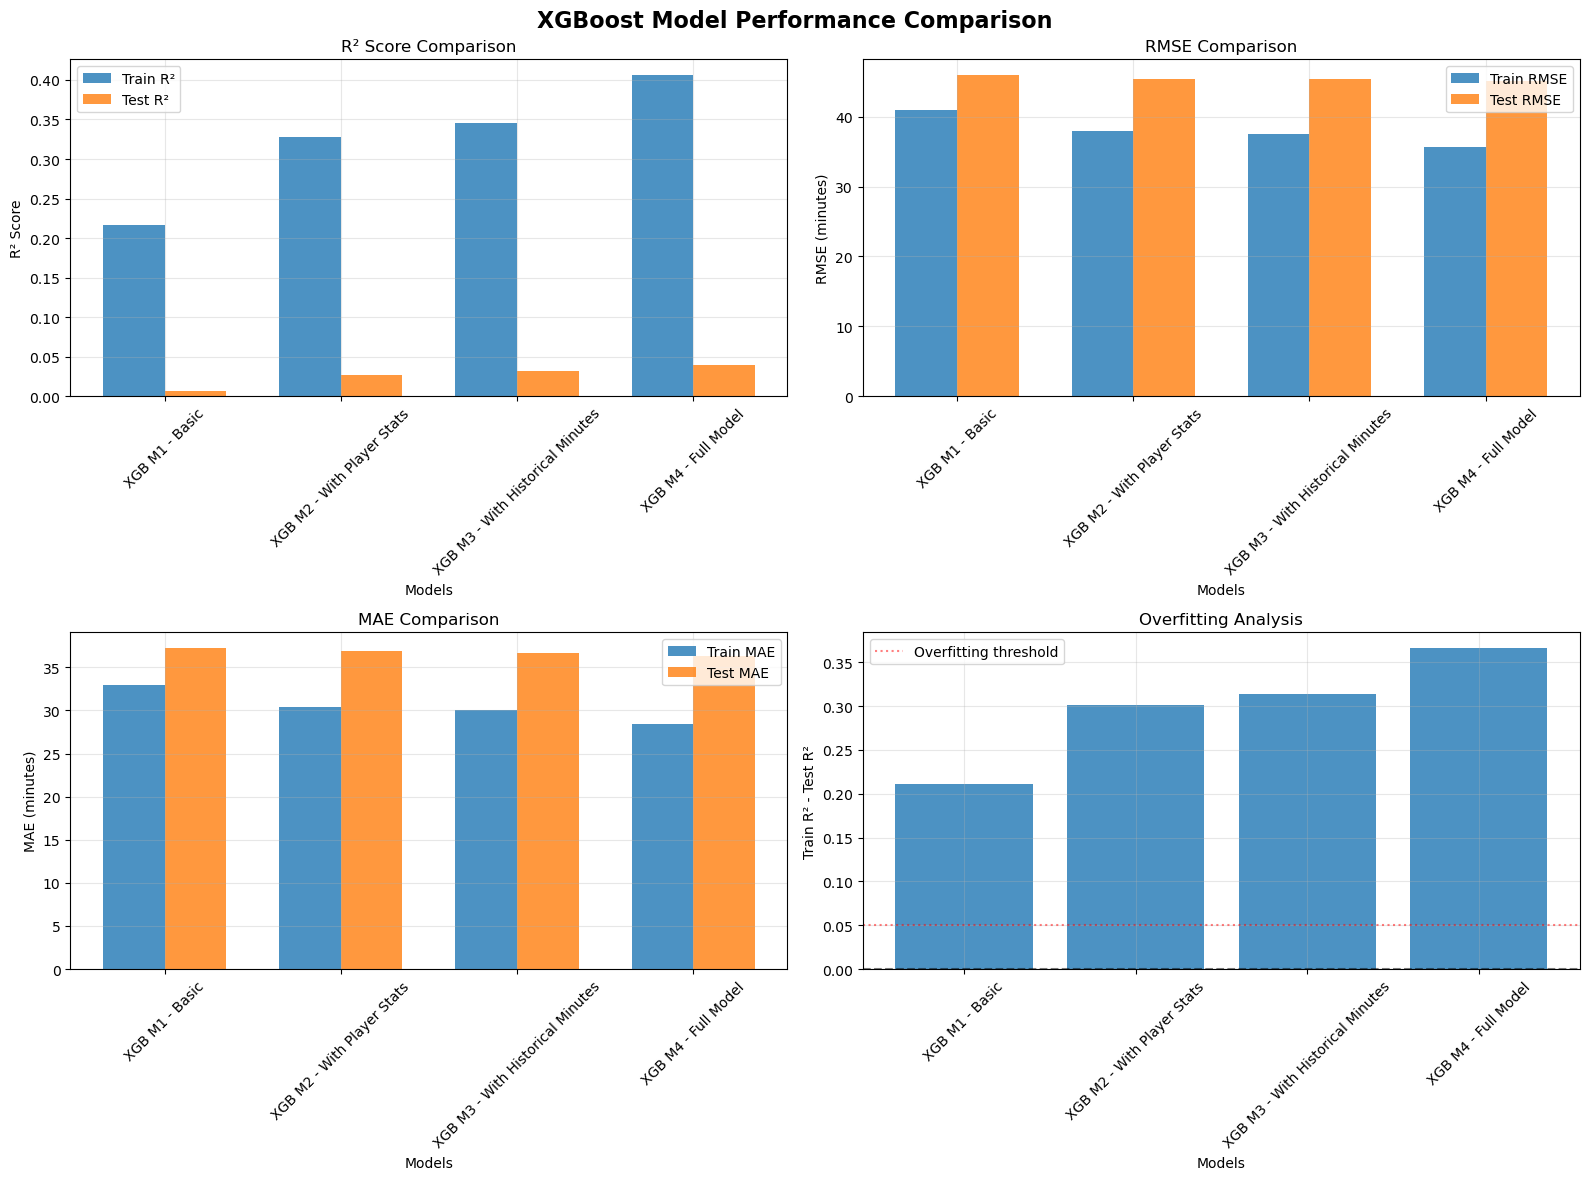


BEST XGBOOST MODEL SUMMARY
Model: XGB Model 4 - Full Model
Test R²: 0.0399
Test RMSE: 45.15 minutes
Test MAE: 36.33 minutes
Number of features: 14

Top 5 Most Important Features:
 1. loser_rank_points        : 0.1170
 2. w_avg_minutes            : 0.0885
 3. l_avg_minutes            : 0.0865
 4. winner_rank_points       : 0.0851
 5. l_avg_ace                : 0.0812

DETAILED XGBOOST ANALYSIS FOR ALL MODELS

Generating detailed analysis for: XGB Model 1 - Basic


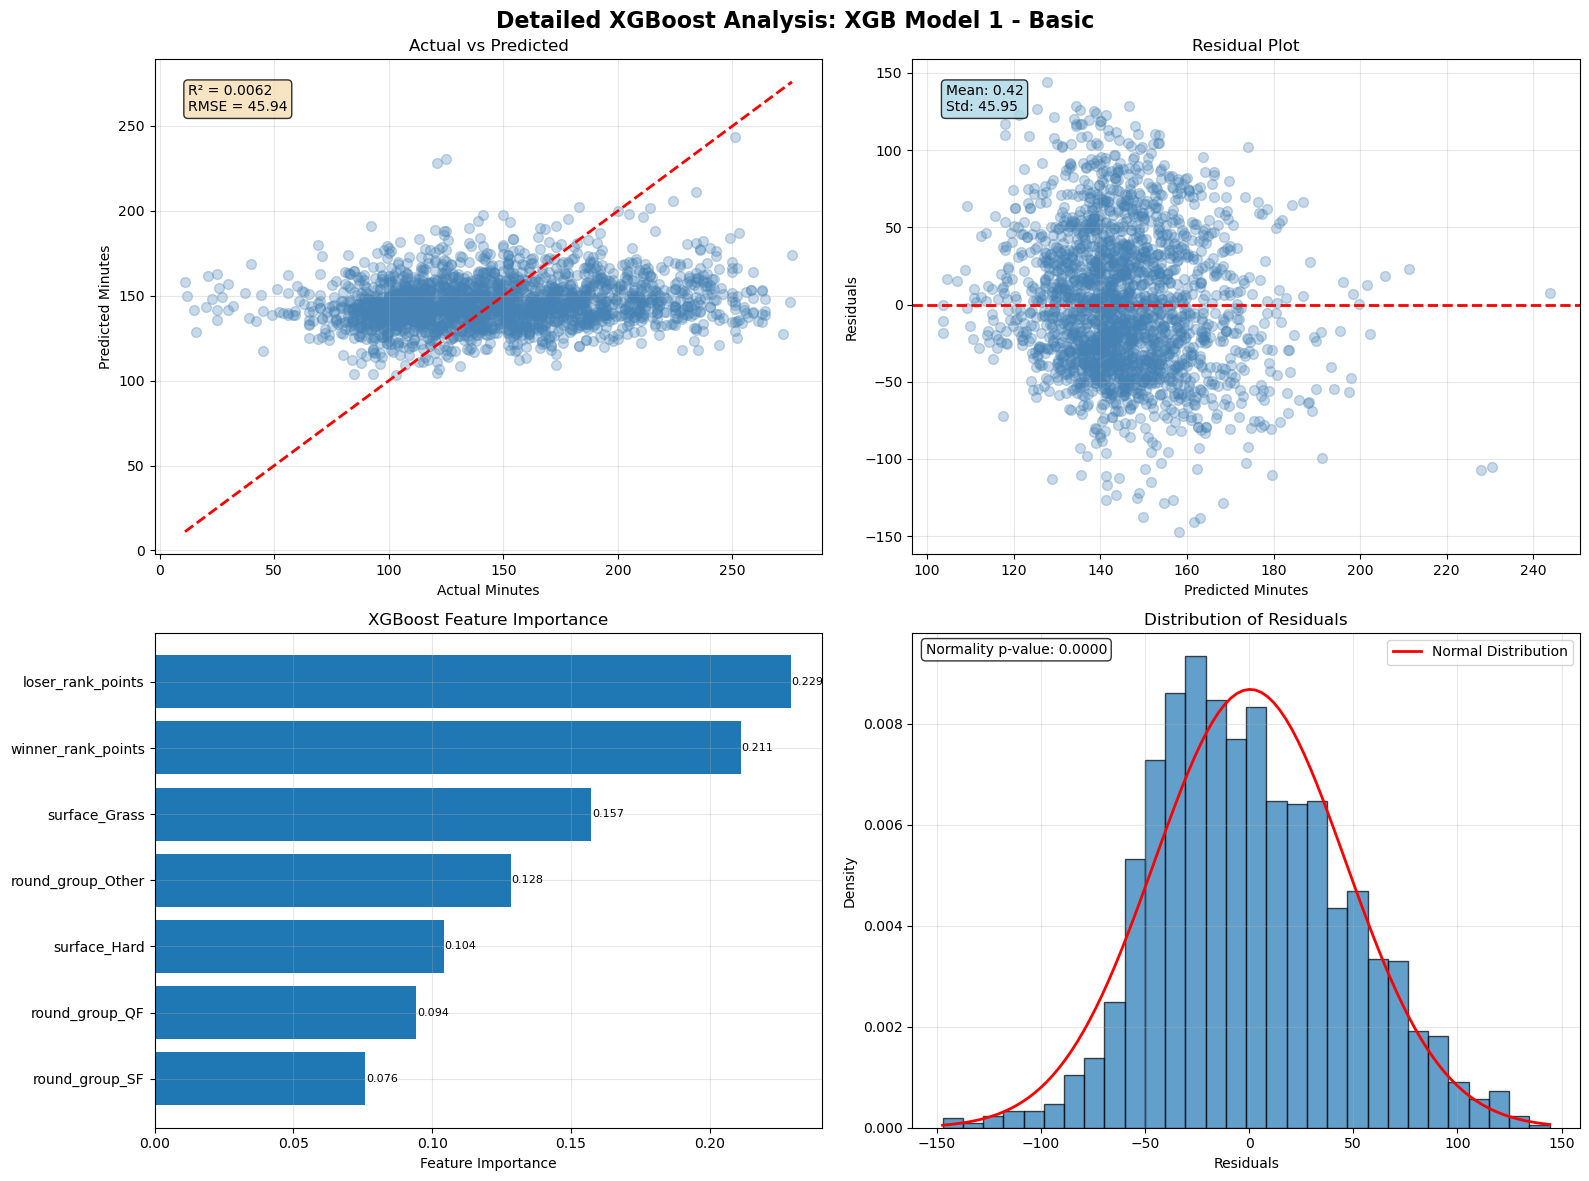


🚀 XGB Model 1 - Basic Summary:
   • Test R²: 0.0062
   • Test RMSE: 45.94 minutes
   • Test MAE: 37.20 minutes
   • Number of features: 7
   • Top 3 most important features:
     1. loser_rank_points: 0.2290 importance score
     2. winner_rank_points: 0.2111 importance score
     3. surface_Grass: 0.1573 importance score
   ⚠️  High overfitting detected: 0.2109
------------------------------------------------------------

Generating detailed analysis for: XGB Model 2 - With Player Stats


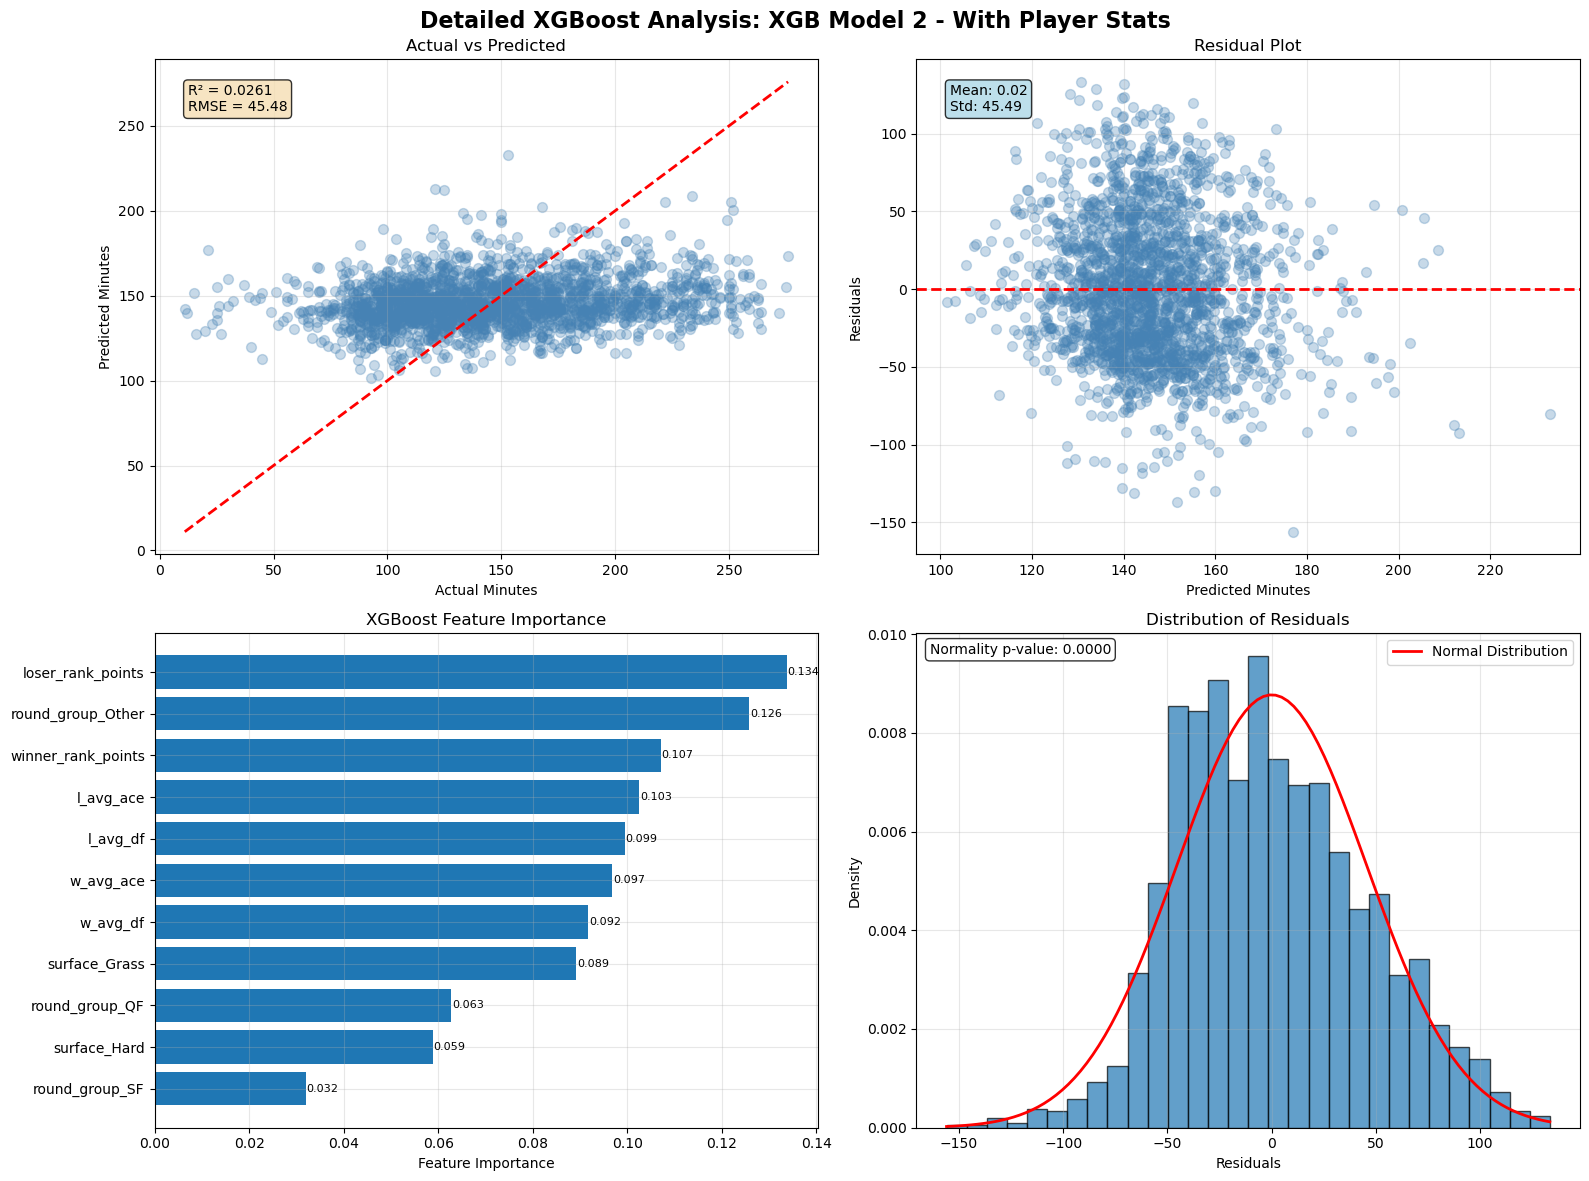


🚀 XGB Model 2 - With Player Stats Summary:
   • Test R²: 0.0261
   • Test RMSE: 45.48 minutes
   • Test MAE: 36.87 minutes
   • Number of features: 11
   • Top 3 most important features:
     1. loser_rank_points: 0.1337 importance score
     2. round_group_Other: 0.1258 importance score
     3. winner_rank_points: 0.1071 importance score
   ⚠️  High overfitting detected: 0.3017
------------------------------------------------------------

Generating detailed analysis for: XGB Model 3 - With Historical Minutes


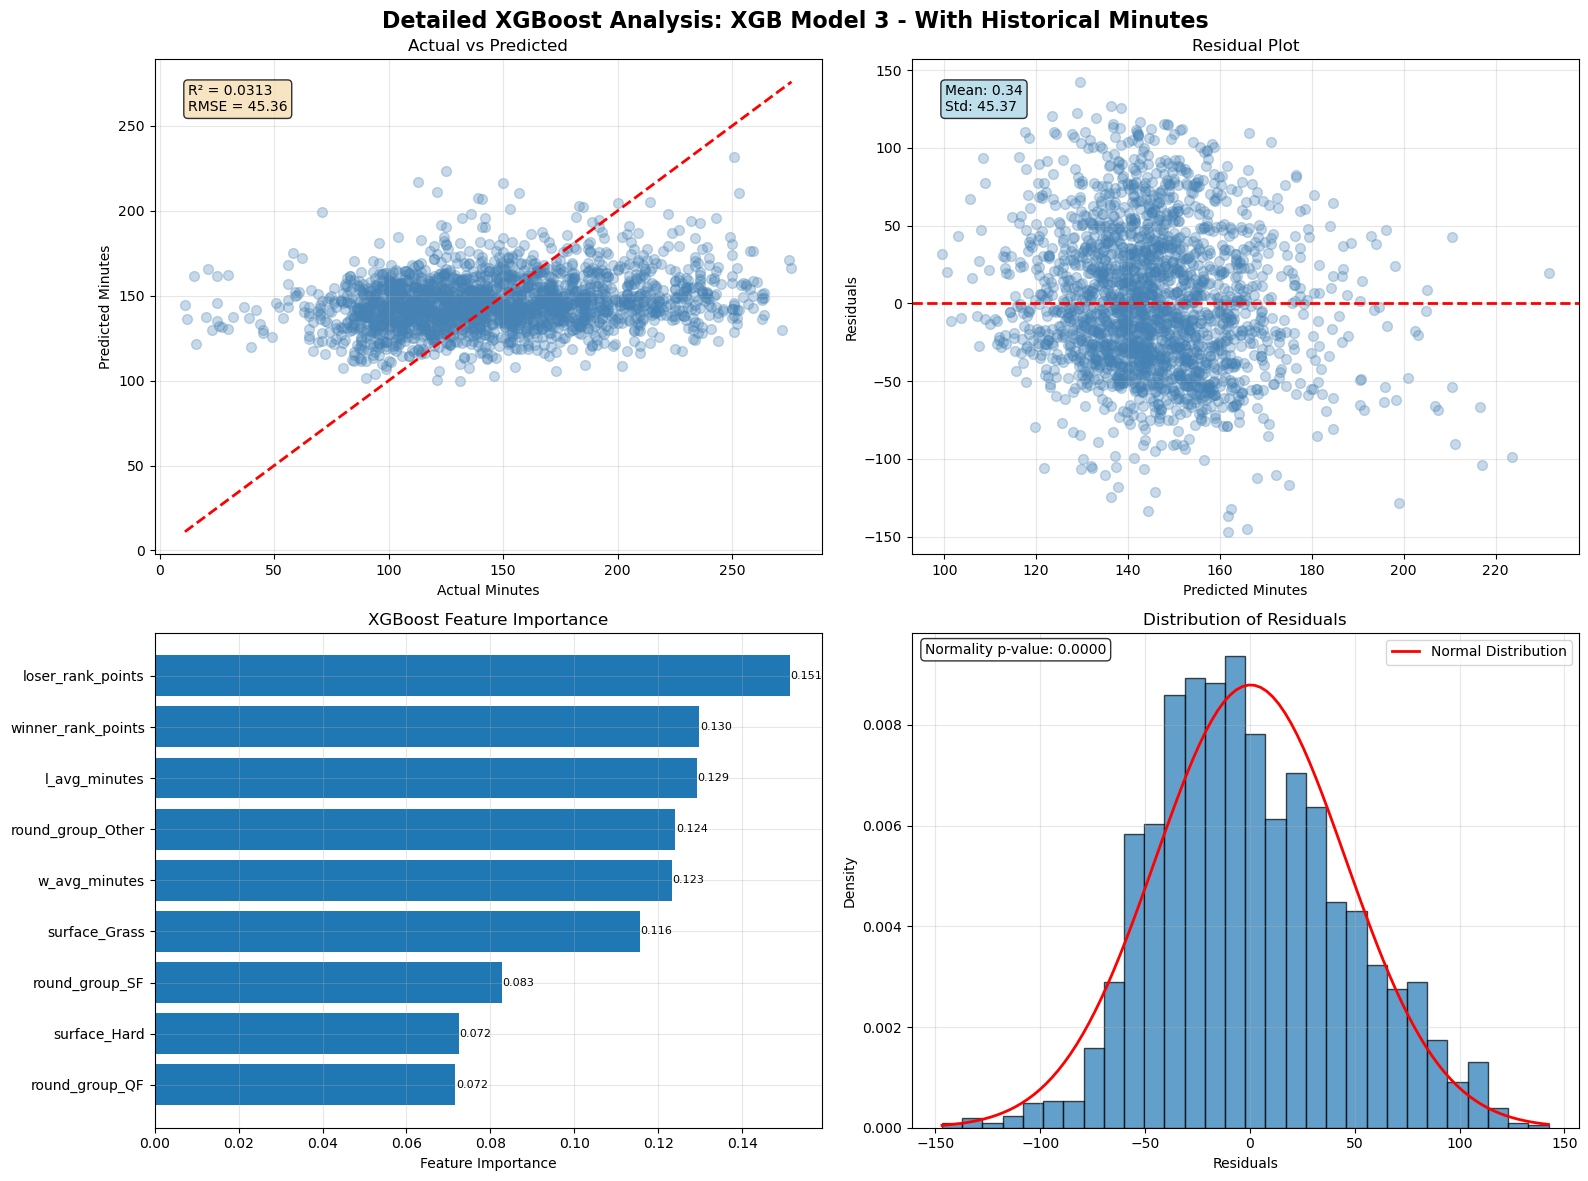


🚀 XGB Model 3 - With Historical Minutes Summary:
   • Test R²: 0.0313
   • Test RMSE: 45.36 minutes
   • Test MAE: 36.67 minutes
   • Number of features: 9
   • Top 3 most important features:
     1. loser_rank_points: 0.1514 importance score
     2. winner_rank_points: 0.1297 importance score
     3. l_avg_minutes: 0.1292 importance score
   ⚠️  High overfitting detected: 0.3141
------------------------------------------------------------

Generating detailed analysis for: XGB Model 4 - Full Model


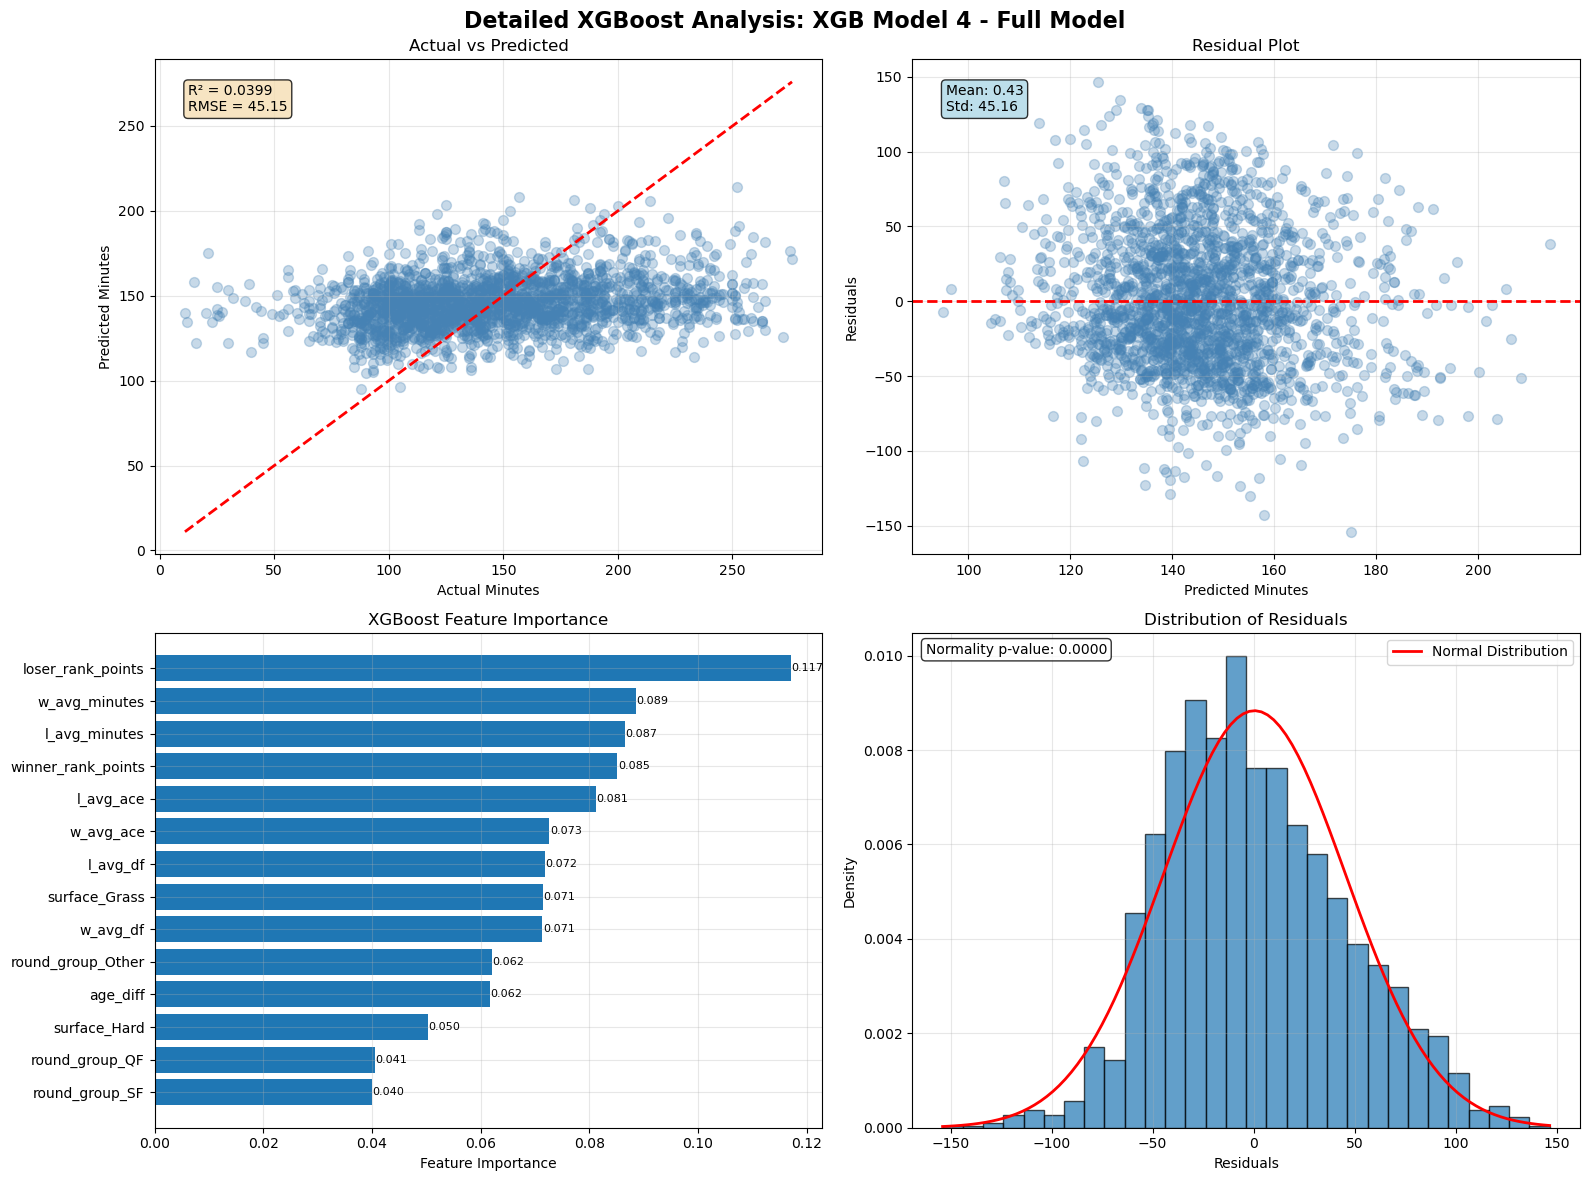


🚀 XGB Model 4 - Full Model Summary:
   • Test R²: 0.0399
   • Test RMSE: 45.15 minutes
   • Test MAE: 36.33 minutes
   • Number of features: 14
   • Top 3 most important features:
     1. loser_rank_points: 0.1170 importance score
     2. w_avg_minutes: 0.0885 importance score
     3. l_avg_minutes: 0.0865 importance score
   ⚠️  High overfitting detected: 0.3659
------------------------------------------------------------


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
#sns.set_palette("husl")

def create_xgboost_models(df):
    """
    Create and compare multiple XGBoost regression models
    """
    
    # Define different feature sets
    models = {
        'XGB Model 1 - Basic': ['round_group_QF', 'round_group_SF', 'round_group_Other', 
                                'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points'],
        
        'XGB Model 2 - With Player Stats': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                           'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                           'loser_rank_points', 'w_avg_ace', 'w_avg_df', 'l_avg_ace', 'l_avg_df'],
        
        'XGB Model 3 - With Historical Minutes': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                                 'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                                 'loser_rank_points', 'w_avg_minutes', 'l_avg_minutes'],
        
        'XGB Model 4 - Full Model': ['age_diff', 'round_group_QF', 'round_group_SF', 'round_group_Other',
                                     'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points',
                                     'w_avg_ace', 'w_avg_df', 'w_avg_minutes', 'l_avg_ace', 'l_avg_df', 'l_avg_minutes']
    }
    
    # Target variable
    y = df['minutes']
    
    # Store results
    results = {}
    trained_models = {}
    test_data = {}  # Store test data for each model
    
    print("=== XGBOOST REGRESSION MODELS COMPARISON ===\n")
    
    for model_name, features in models.items():
        print(f"\n--- {model_name} ---")
        print(f"Features: {len(features)}")
        
        # Prepare data for this specific model
        X = df[features]
        X_train, X_test, y_train_model, y_test_model = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Store test data for later use
        test_data[model_name] = {'X_test': X_test, 'y_test': y_test_model}
        
        # Create and train XGBoost model
        model = xgb.XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1
        )
        
        model.fit(X_train, y_train_model)
        
        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Metrics
        train_r2 = r2_score(y_train_model, y_pred_train)
        test_r2 = r2_score(y_test_model, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
        train_mae = mean_absolute_error(y_train_model, y_pred_train)
        test_mae = mean_absolute_error(y_test_model, y_pred_test)
        
        # Get feature importance
        feature_importance = model.feature_importances_
        
        # Store results
        results[model_name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'features': features,
            'feature_importance': feature_importance
        }
        
        trained_models[model_name] = model
        
        print(f"Train R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")
    
    return results, trained_models, test_data

def plot_xgboost_model_comparison(results):
    """
    Create comparison plots for all XGBoost models
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('XGBoost Model Performance Comparison', fontsize=16, fontweight='bold')
    
    models = list(results.keys())
    
    # R² comparison
    train_r2 = [results[model]['train_r2'] for model in models]
    test_r2 = [results[model]['test_r2'] for model in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[0,0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8, color='C0')
    axes[0,0].bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8, color='C1')
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_title('R² Score Comparison')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels([m.replace('XGB Model ', 'XGB M') for m in models], rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # RMSE comparison
    train_rmse = [results[model]['train_rmse'] for model in models]
    test_rmse = [results[model]['test_rmse'] for model in models]
    
    axes[0,1].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8, color='C0')
    axes[0,1].bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8, color='C1')
    axes[0,1].set_xlabel('Models')
    axes[0,1].set_ylabel('RMSE (minutes)')
    axes[0,1].set_title('RMSE Comparison')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels([m.replace('XGB Model ', 'XGB M') for m in models], rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # MAE comparison
    train_mae = [results[model]['train_mae'] for model in models]
    test_mae = [results[model]['test_mae'] for model in models]
    
    axes[1,0].bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.8, color='C0')
    axes[1,0].bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.8, color='C1')
    axes[1,0].set_xlabel('Models')
    axes[1,0].set_ylabel('MAE (minutes)')
    axes[1,0].set_title('MAE Comparison')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels([m.replace('XGB Model ', 'XGB M') for m in models], rotation=45)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Overfitting analysis (Train R² - Test R²)
    overfitting = [results[model]['train_r2'] - results[model]['test_r2'] for model in models]
    
    colors = ['red' if x > 0.05 else 'green' if x < 0 else 'orange' for x in overfitting]
    axes[1,1].bar(range(len(models)), overfitting, alpha=0.8, color='C0')
    axes[1,1].set_xlabel('Models')
    axes[1,1].set_ylabel('Train R² - Test R²')
    axes[1,1].set_title('Overfitting Analysis')
    axes[1,1].set_xticks(range(len(models)))
    axes[1,1].set_xticklabels([m.replace('XGB Model ', 'XGB M') for m in models], rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1,1].axhline(y=0.05, color='red', linestyle=':', alpha=0.5, label='Overfitting threshold')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()

def plot_detailed_xgboost_analysis(model_name, results, trained_models, test_data, df):
    """
    Detailed analysis of a specific XGBoost model
    """
    
    model = trained_models[model_name]
    features = results[model_name]['features']
    
    # Get the correct test data for this model
    X_test = test_data[model_name]['X_test']
    y_test = test_data[model_name]['y_test']
    
    # Predictions
    y_pred = model.predict(X_test)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Detailed XGBoost Analysis: {model_name}', fontsize=16, fontweight='bold')
    
    # Actual vs Predicted
    axes[0,0].scatter(y_test, y_pred, alpha=0.3, color='steelblue', s=50)
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Minutes')
    axes[0,0].set_ylabel('Predicted Minutes')
    axes[0,0].set_title('Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add R² and RMSE to the plot
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    axes[0,0].text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.2f}', 
                   transform=axes[0,0].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # Residuals
    residuals = y_test - y_pred
    axes[0,1].scatter(y_pred, residuals, alpha=0.3, color='steelblue', s=50)
    axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Predicted Minutes')
    axes[0,1].set_ylabel('Residuals')
    axes[0,1].set_title('Residual Plot')
    axes[0,1].grid(True, alpha=0.3)
    
    # Add residual statistics
    res_mean, res_std = residuals.mean(), residuals.std()
    axes[0,1].text(0.05, 0.95, f'Mean: {res_mean:.2f}\nStd: {res_std:.2f}', 
                   transform=axes[0,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    
    # Feature importance
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': results[model_name]['feature_importance']
    }).sort_values('Importance', ascending=True)
    
    # Color bars based on importance level
    colors = plt.cm.viridis(importance_df['Importance'] / importance_df['Importance'].max())
    bars = axes[1,0].barh(importance_df['Feature'], importance_df['Importance'], color='C0')
    axes[1,0].set_xlabel('Feature Importance')
    axes[1,0].set_title('XGBoost Feature Importance')
    axes[1,0].grid(True, alpha=0.3)
    
    # Add importance values on bars
    for i, (bar, importance) in enumerate(zip(bars, importance_df['Importance'])):
        axes[1,0].text(importance + importance_df['Importance'].max() * 0.001, 
                      bar.get_y() + bar.get_height()/2, 
                      f'{importance:.3f}', 
                      va='center', fontsize=8)
    
    # Distribution of residuals with improved visualization
    axes[1,1].hist(residuals, bins=30, alpha=0.7, edgecolor='black', color='C0', density=True)
    axes[1,1].set_xlabel('Residuals')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Distribution of Residuals')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add normal distribution overlay
    mu, sigma = residuals.mean(), residuals.std()
    x = np.linspace(residuals.min(), residuals.max(), 100)
    normal_dist = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    axes[1,1].plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
    axes[1,1].legend()
    
    # Add Q-Q plot line for normality check
    from scipy import stats
    _, p_value = stats.normaltest(residuals)
    axes[1,1].text(0.02, 0.98, f'Normality p-value: {p_value:.4f}', 
                   transform=axes[1,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_all_xgboost_models_analysis(results, trained_models, test_data, df):
    """
    Show detailed analysis for all XGBoost models
    """
    print("\n" + "="*70)
    print("DETAILED XGBOOST ANALYSIS FOR ALL MODELS")
    print("="*70)
    
    for model_name in results.keys():
        print(f"\nGenerating detailed analysis for: {model_name}")
        plot_detailed_xgboost_analysis(model_name, results, trained_models, test_data, df)
        
        # Print model summary with feature importance
        model_results = results[model_name]
        print(f"\n🚀 {model_name} Summary:")
        print(f"   • Test R²: {model_results['test_r2']:.4f}")
        print(f"   • Test RMSE: {model_results['test_rmse']:.2f} minutes")
        print(f"   • Test MAE: {model_results['test_mae']:.2f} minutes")
        print(f"   • Number of features: {len(model_results['features'])}")
        
        # Show top 3 most important features
        importance_df = pd.DataFrame({
            'Feature': model_results['features'],
            'Importance': model_results['feature_importance']
        }).sort_values('Importance', ascending=False)
        
        print(f"   • Top 3 most important features:")
        for i, (_, row) in enumerate(importance_df.head(3).iterrows(), 1):
            print(f"     {i}. {row['Feature']}: {row['Importance']:.4f} importance score")
        
        # Overfitting check
        overfitting_score = model_results['train_r2'] - model_results['test_r2']
        if overfitting_score > 0.05:
            print(f"   ⚠️  High overfitting detected: {overfitting_score:.4f}")
        elif overfitting_score < 0:
            print(f"   ✅ No overfitting (model generalizes well): {overfitting_score:.4f}")
        else:
            print(f"   ✅ Low overfitting: {overfitting_score:.4f}")
            
        print("-" * 60)

def print_best_xgboost_model_summary(results):
    """
    Print summary of the best XGBoost model
    """
    
    # Find best model based on test R²
    best_model = max(results.items(), key=lambda x: x[1]['test_r2'])
    best_name, best_metrics = best_model
    
    print("\n" + "="*60)
    print("BEST XGBOOST MODEL SUMMARY")
    print("="*60)
    print(f"Model: {best_name}")
    print(f"Test R²: {best_metrics['test_r2']:.4f}")
    print(f"Test RMSE: {best_metrics['test_rmse']:.2f} minutes")
    print(f"Test MAE: {best_metrics['test_mae']:.2f} minutes")
    print(f"Number of features: {len(best_metrics['features'])}")
    
    print(f"\nTop 5 Most Important Features:")
    importance_df = pd.DataFrame({
        'Feature': best_metrics['features'],
        'Importance': best_metrics['feature_importance']
    }).sort_values('Importance', ascending=False)
    
    for i, (_, row) in enumerate(importance_df.head(5).iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<25}: {row['Importance']:.4f}")
    
    return best_name

def run_complete_xgboost_analysis(df):
    """
    Run the complete XGBoost regression analysis
    """
    
    print("Starting Tennis Match Duration XGBoost Analysis...")
    print(f"Dataset shape: {df.shape}")
    print(f"Target variable (minutes) - Mean: {df['minutes'].mean():.2f}, Std: {df['minutes'].std():.2f}")
    
    # Run all XGBoost models
    results, trained_models, test_data = create_xgboost_models(df)
    
    # Plot comparison
    plot_xgboost_model_comparison(results)
    
    # Find and print best model summary
    best_model_name = print_best_xgboost_model_summary(results)
    
    # Detailed analysis of ALL models
    plot_all_xgboost_models_analysis(results, trained_models, test_data, df)
    
    return results, trained_models

def run_xgboost_analysis_single_model(df, model_name=None):
    """
    Run XGBoost analysis for a single specific model
    """
    
    # Run all models first
    results, trained_models, test_data = create_xgboost_models(df)
    
    if model_name is None:
        # Show available models
        print("Available XGBoost models:")
        for i, name in enumerate(results.keys(), 1):
            print(f"{i}. {name}")
        return results, trained_models
    
    if model_name in results:
        print(f"\n=== DETAILED XGBOOST ANALYSIS FOR {model_name} ===")
        plot_detailed_xgboost_analysis(model_name, results, trained_models, test_data, df)
        
        # Print detailed feature importance analysis
        model_results = results[model_name]
        print(f"\n🚀 Detailed Feature Importance Analysis for {model_name}:")
        print("-" * 70)
        
        importance_df = pd.DataFrame({
            'Feature': model_results['features'],
            'Importance': model_results['feature_importance']
        }).sort_values('Importance', ascending=False)
        
        total_importance = importance_df['Importance'].sum()
        
        for _, row in importance_df.iterrows():
            percentage = (row['Importance'] / total_importance) * 100
            print(f"• {row['Feature']:<25}: {row['Importance']:.4f} ({percentage:5.1f}% of total importance)")
        
    else:
        print(f"Model '{model_name}' not found. Available models: {list(results.keys())}")
    
    return results, trained_models

def compare_linear_vs_xgboost(df, linear_results, xgb_results):
    """
    Compare Linear Regression vs XGBoost performance
    """
    
    print("\n" + "="*80)
    print("LINEAR REGRESSION vs XGBOOST COMPARISON")
    print("="*80)
    
    comparison_data = []
    
    # Map corresponding models
    model_mapping = {
        'Model 1 - Basic': 'XGB Model 1 - Basic',
        'Model 2 - With Player Stats': 'XGB Model 2 - With Player Stats',
        'Model 3 - With Historical Minutes': 'XGB Model 3 - With Historical Minutes',
        'Model 4 - Full Model': 'XGB Model 4 - Full Model'
    }
    
    for linear_name, xgb_name in model_mapping.items():
        if linear_name in linear_results and xgb_name in xgb_results:
            linear_r2 = linear_results[linear_name]['test_r2']
            xgb_r2 = xgb_results[xgb_name]['test_r2']
            linear_rmse = linear_results[linear_name]['test_rmse']
            xgb_rmse = xgb_results[xgb_name]['test_rmse']
            
            improvement_r2 = ((xgb_r2 - linear_r2) / linear_r2) * 100
            improvement_rmse = ((linear_rmse - xgb_rmse) / linear_rmse) * 100
            
            print(f"\n{linear_name.replace('Model ', '')}:")
            print(f"  Linear Regression - R²: {linear_r2:.4f}, RMSE: {linear_rmse:.2f}")
            print(f"  XGBoost          - R²: {xgb_r2:.4f}, RMSE: {xgb_rmse:.2f}")
            print(f"  Improvement      - R²: {improvement_r2:+.1f}%, RMSE: {improvement_rmse:+.1f}%")
            
            if improvement_r2 > 5:
                print(f"  🚀 XGBoost significantly outperforms Linear Regression!")
            elif improvement_r2 > 0:
                print(f"  ✅ XGBoost performs better")
            else:
                print(f"  ⚠️  Linear Regression performs better")

# Example usage:
print("🚀 XGBoost Analysis Code is ready! Choose one of these options:")
print("\n🔍 OPTION 1 - Complete XGBoost Analysis (ALL models with detailed plots):")
print("xgb_results, xgb_models = run_complete_xgboost_analysis(df_clean)")

print("\n🎯 OPTION 2 - Single XGBoost Model Analysis:")
print("xgb_results, xgb_models = run_xgboost_analysis_single_model(df_clean, 'XGB Model 4 - Full Model')")

print("\n📋 OPTION 3 - List available XGBoost models:")
print("xgb_results, xgb_models = run_xgboost_analysis_single_model(df_clean)")

print("\n🆚 OPTION 4 - Compare Linear Regression vs XGBoost:")
print("# First run both analyses, then:")
print("compare_linear_vs_xgboost(df_clean, linear_results, xgb_results)")

print("\n💡 Available XGBoost model names:")
print("• 'XGB Model 1 - Basic'")
print("• 'XGB Model 2 - With Player Stats'") 
print("• 'XGB Model 3 - With Historical Minutes'")
print("• 'XGB Model 4 - Full Model'")

xgb_results, xgb_models = run_complete_xgboost_analysis(df_clean)

# Random forest

🌲 Random Forest Analysis Code is ready!
To run the complete analysis, use:
rf_results, rf_models = run_complete_randomforest_analysis(df_clean)
Starting Tennis Match Duration Random Forest Analysis...
Dataset shape: (10746, 18)
Target variable (minutes) - Mean: 145.48, Std: 46.28
=== RANDOM FOREST REGRESSION MODELS COMPARISON ===


--- RF Model 1 - Basic ---
Features: 7
Train R²: 0.5718
Test R²: -0.0472
OOB Score: -0.0407
Train RMSE: 30.31
Test RMSE: 47.16
Train MAE: 23.95
Test MAE: 38.07

--- RF Model 2 - With Player Stats ---
Features: 11
Train R²: 0.6718
Test R²: 0.0354
OOB Score: 0.0125
Train RMSE: 26.54
Test RMSE: 45.26
Train MAE: 20.90
Test MAE: 36.53

--- RF Model 3 - With Historical Minutes ---
Features: 9
Train R²: 0.6605
Test R²: 0.0300
OOB Score: 0.0175
Train RMSE: 26.99
Test RMSE: 45.39
Train MAE: 21.25
Test MAE: 36.63

--- RF Model 4 - Full Model ---
Features: 14
Train R²: 0.7135
Test R²: 0.0547
OOB Score: 0.0432
Train RMSE: 24.79
Test RMSE: 44.81
Train MAE: 19.50
Test MAE

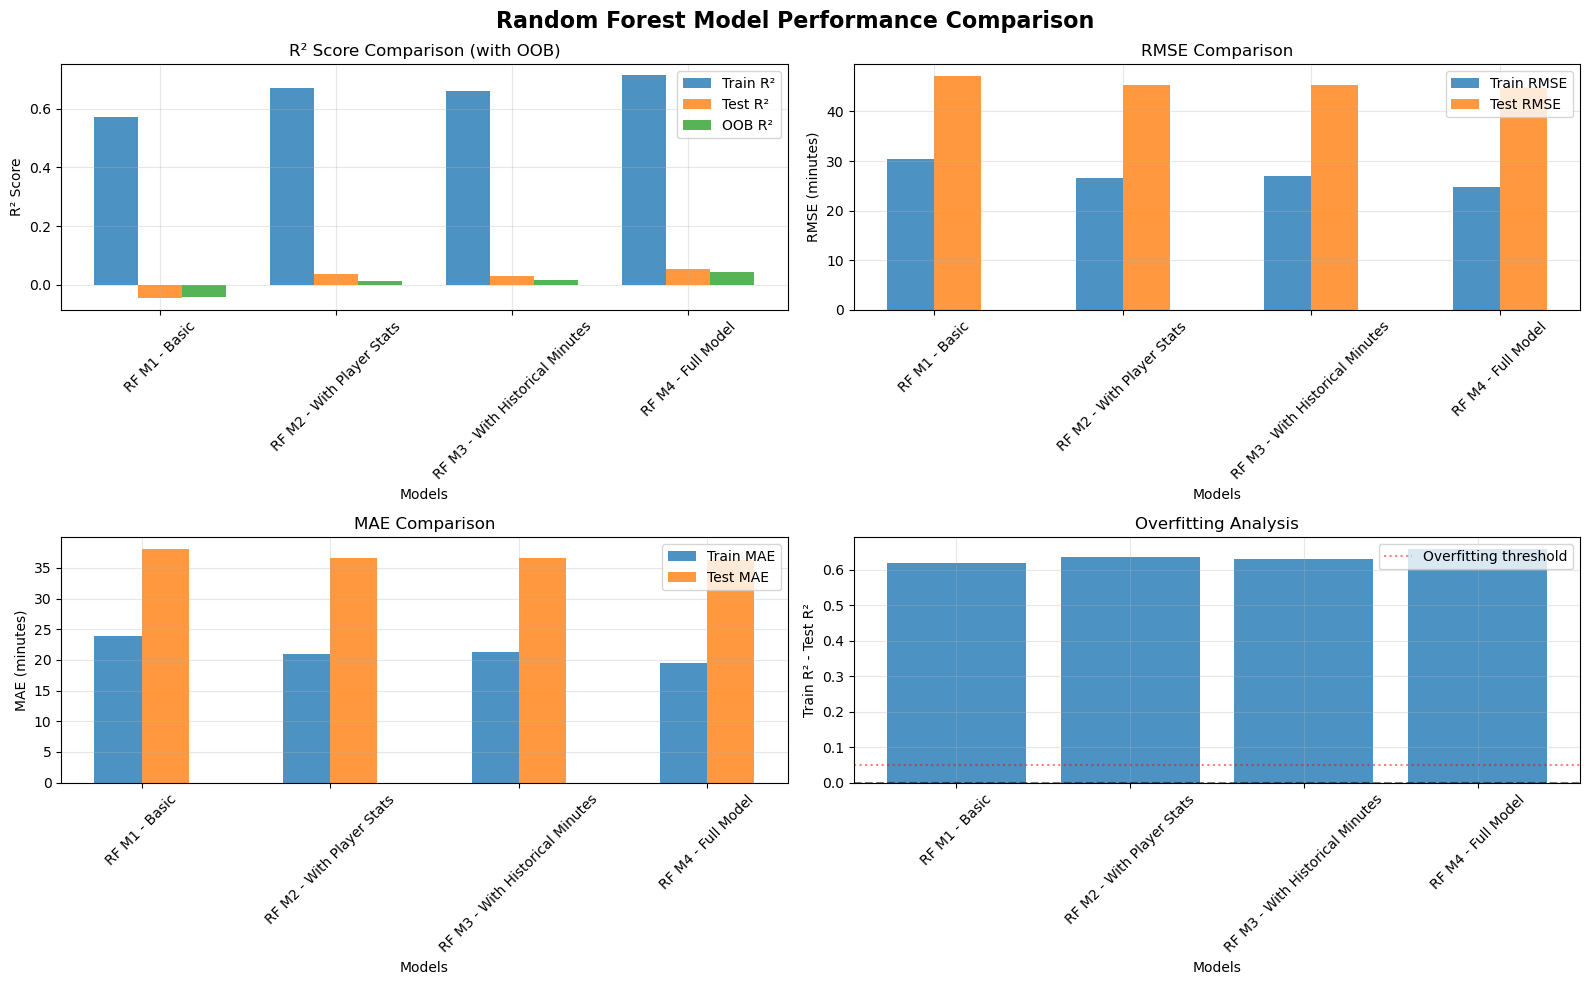


BEST RANDOM FOREST MODEL SUMMARY
Model: RF Model 4 - Full Model
Test R²: 0.0547
OOB R²: 0.0432
Test RMSE: 44.81 minutes
Test MAE: 36.21 minutes
Number of features: 14

Top 5 Most Important Features (Permutation Importance):
 1. loser_rank_points        : 0.0679
 2. winner_rank_points       : 0.0198
 3. w_avg_minutes            : 0.0147
 4. l_avg_minutes            : 0.0105
 5. surface_Grass            : 0.0083

DETAILED RANDOM FOREST ANALYSIS FOR ALL MODELS

Generating detailed analysis for: RF Model 1 - Basic


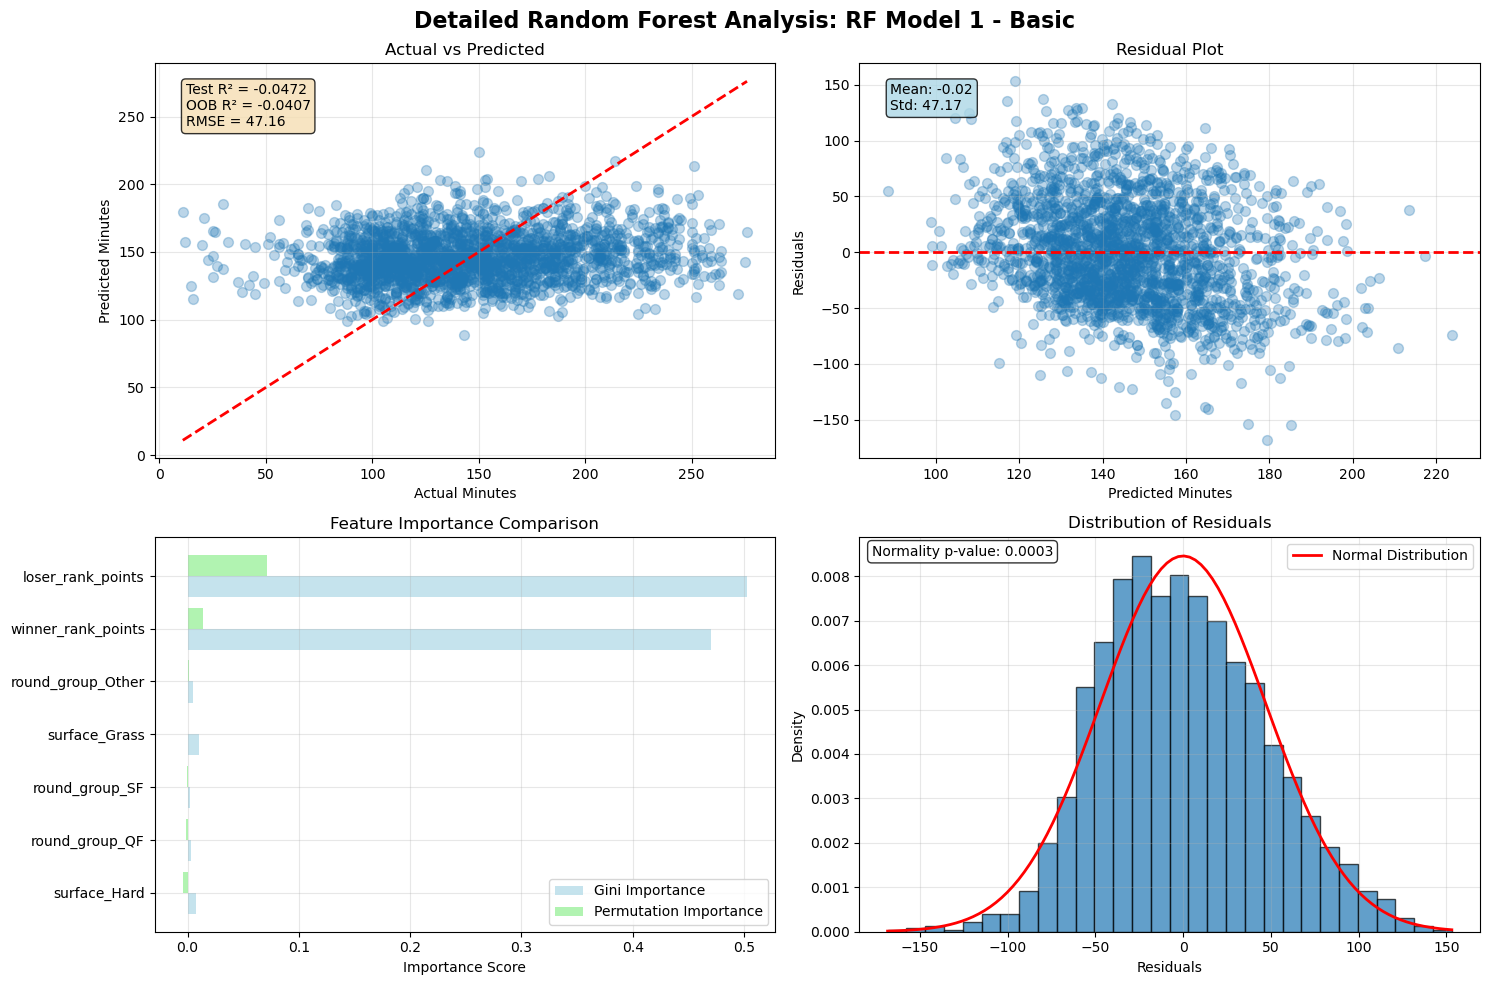


🌲 RF Model 1 - Basic Summary:
   • Test R²: -0.0472
   • OOB R²: -0.0407
   • Test RMSE: 47.16 minutes
   • Test MAE: 38.07 minutes
   • Number of features: 7
   • Top 3 most important features (permutation):
     1. loser_rank_points: 0.0717
     2. winner_rank_points: 0.0138
     3. round_group_Other: 0.0011
   ⚠️  High overfitting detected: 0.6190
------------------------------------------------------------

Generating detailed analysis for: RF Model 2 - With Player Stats


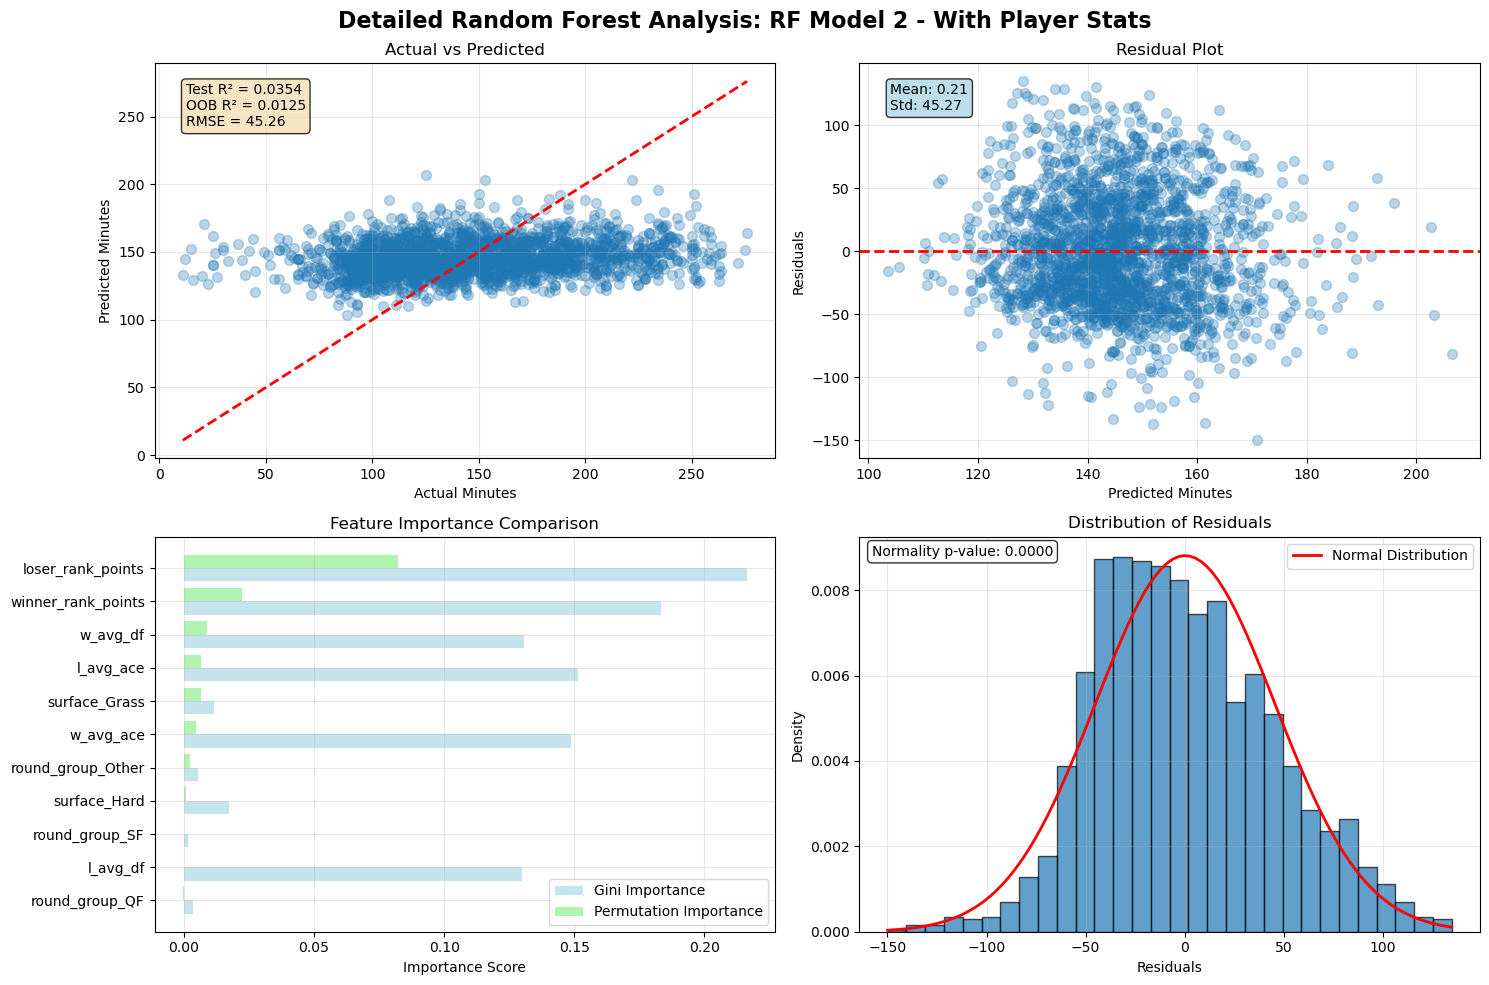


🌲 RF Model 2 - With Player Stats Summary:
   • Test R²: 0.0354
   • OOB R²: 0.0125
   • Test RMSE: 45.26 minutes
   • Test MAE: 36.53 minutes
   • Number of features: 11
   • Top 3 most important features (permutation):
     1. loser_rank_points: 0.0821
     2. winner_rank_points: 0.0222
     3. w_avg_df: 0.0088
   ⚠️  High overfitting detected: 0.6364
------------------------------------------------------------

Generating detailed analysis for: RF Model 3 - With Historical Minutes


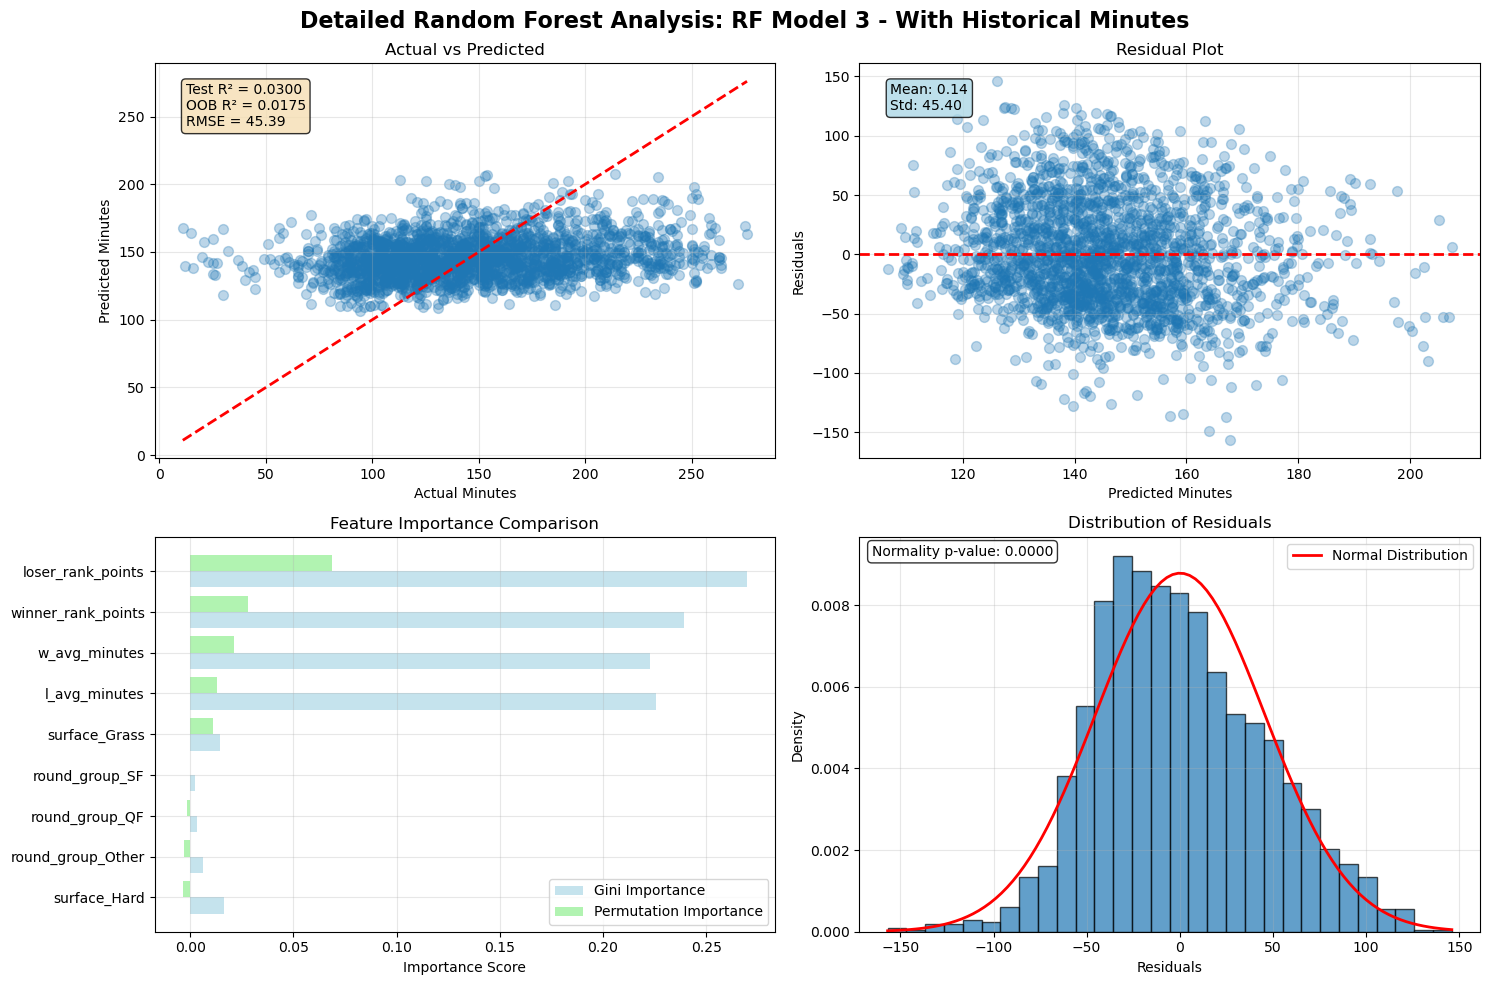


🌲 RF Model 3 - With Historical Minutes Summary:
   • Test R²: 0.0300
   • OOB R²: 0.0175
   • Test RMSE: 45.39 minutes
   • Test MAE: 36.63 minutes
   • Number of features: 9
   • Top 3 most important features (permutation):
     1. loser_rank_points: 0.0688
     2. winner_rank_points: 0.0278
     3. w_avg_minutes: 0.0212
   ⚠️  High overfitting detected: 0.6305
------------------------------------------------------------

Generating detailed analysis for: RF Model 4 - Full Model


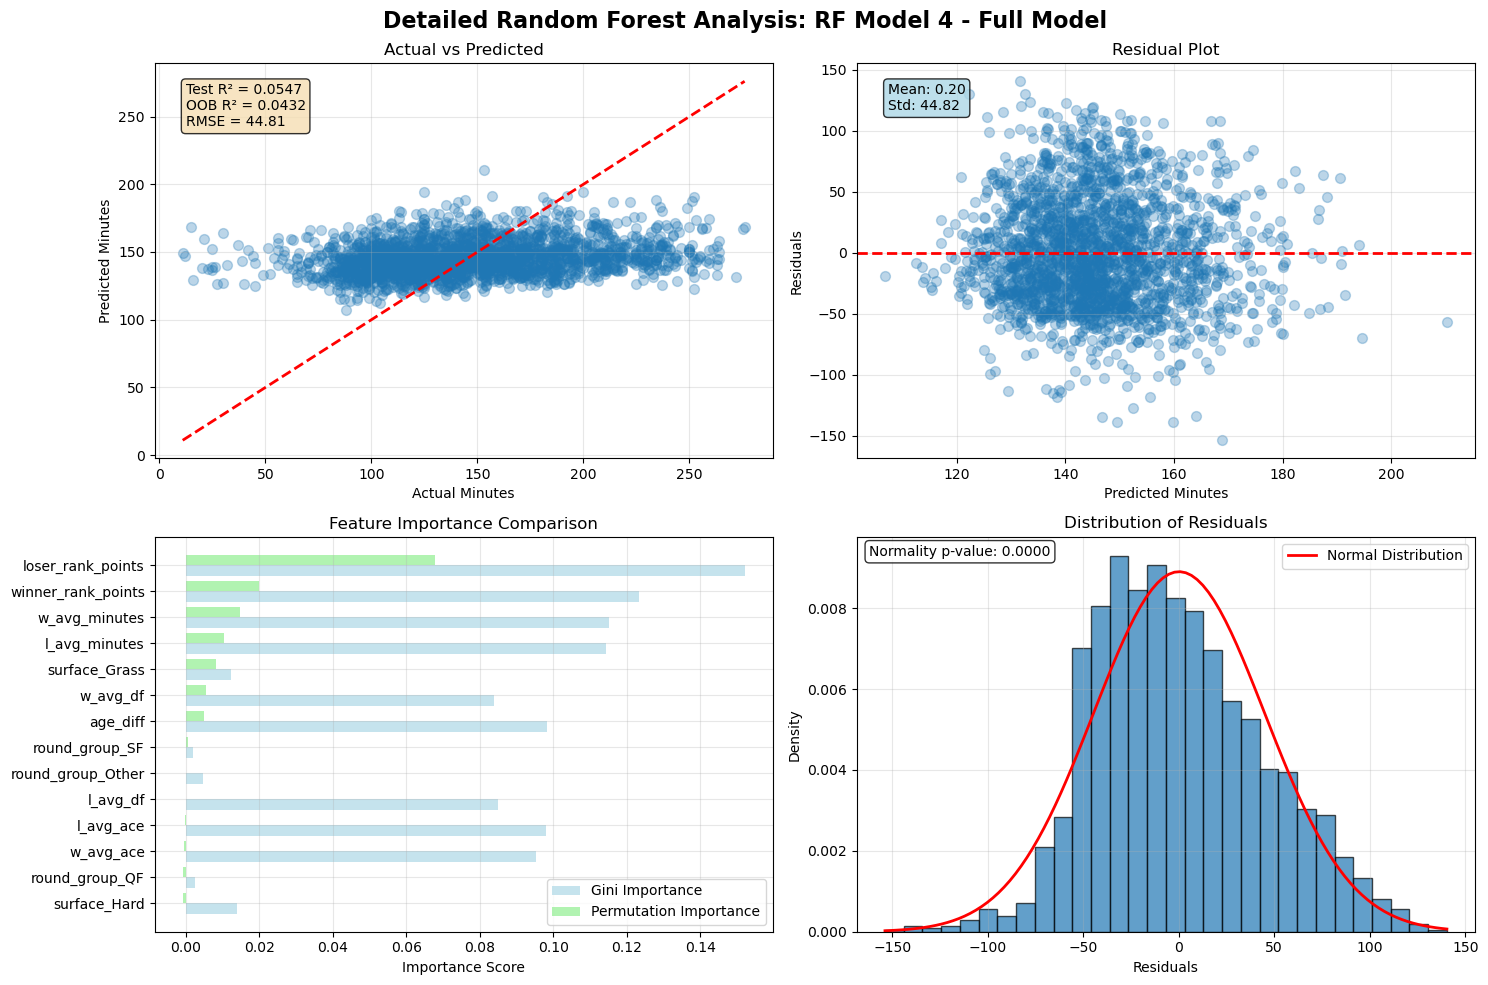


🌲 RF Model 4 - Full Model Summary:
   • Test R²: 0.0547
   • OOB R²: 0.0432
   • Test RMSE: 44.81 minutes
   • Test MAE: 36.21 minutes
   • Number of features: 14
   • Top 3 most important features (permutation):
     1. loser_rank_points: 0.0679
     2. winner_rank_points: 0.0198
     3. w_avg_minutes: 0.0147
   ⚠️  High overfitting detected: 0.6588
------------------------------------------------------------


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
#sns.set_palette("husl")

def create_randomforest_models(df):
    """
    Create and compare multiple Random Forest regression models
    """
    
    # Define different feature sets
    models = {
        'RF Model 1 - Basic': ['round_group_QF', 'round_group_SF', 'round_group_Other', 
                               'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points'],
        
        'RF Model 2 - With Player Stats': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                          'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                          'loser_rank_points', 'w_avg_ace', 'w_avg_df', 'l_avg_ace', 'l_avg_df'],
        
        'RF Model 3 - With Historical Minutes': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                                'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                                'loser_rank_points', 'w_avg_minutes', 'l_avg_minutes'],
        
        'RF Model 4 - Full Model': ['age_diff', 'round_group_QF', 'round_group_SF', 'round_group_Other',
                                    'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points',
                                    'w_avg_ace', 'w_avg_df', 'w_avg_minutes', 'l_avg_ace', 'l_avg_df', 'l_avg_minutes']
    }
    
    # Target variable
    y = df['minutes']
    
    # Store results
    results = {}
    trained_models = {}
    test_data = {}
    
    print("=== RANDOM FOREST REGRESSION MODELS COMPARISON ===\n")
    
    for model_name, features in models.items():
        print(f"\n--- {model_name} ---")
        print(f"Features: {len(features)}")
        
        # Prepare data for this specific model
        X = df[features]
        X_train, X_test, y_train_model, y_test_model = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Store test data for later use
        test_data[model_name] = {'X_test': X_test, 'y_test': y_test_model}
        
        # Create and train Random Forest model
        model = RandomForestRegressor(
            n_estimators=100,
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            bootstrap=True,
            random_state=42,
            n_jobs=-1,
            oob_score=True
        )
        
        model.fit(X_train, y_train_model)
        
        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Metrics
        train_r2 = r2_score(y_train_model, y_pred_train)
        test_r2 = r2_score(y_test_model, y_pred_test)
        oob_score = model.oob_score_
        train_rmse = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
        train_mae = mean_absolute_error(y_train_model, y_pred_train)
        test_mae = mean_absolute_error(y_test_model, y_pred_test)
        
        # Get feature importance
        feature_importance = model.feature_importances_
        
        # Calculate permutation importance
        perm_importance = permutation_importance(model, X_test, y_test_model, n_repeats=10, random_state=42)
        
        # Store results
        results[model_name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'oob_score': oob_score,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'features': features,
            'feature_importance': feature_importance,
            'permutation_importance': perm_importance.importances_mean
        }
        
        trained_models[model_name] = model
        
        print(f"Train R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"OOB Score: {oob_score:.4f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")
        print(f"Train MAE: {train_mae:.2f}")
        print(f"Test MAE: {test_mae:.2f}")
    
    return results, trained_models, test_data

def plot_randomforest_model_comparison(results):
    """
    Create comparison plots for all Random Forest models
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Random Forest Model Performance Comparison', fontsize=16, fontweight='bold')
    
    models = list(results.keys())
    
    # R² comparison (including OOB score)
    train_r2 = [results[model]['train_r2'] for model in models]
    test_r2 = [results[model]['test_r2'] for model in models]
    oob_r2 = [results[model]['oob_score'] for model in models]
    
    x = np.arange(len(models))
    width = 0.25
    
    axes[0,0].bar(x - width, train_r2, width, label='Train R²', alpha=0.8, color='C0')
    axes[0,0].bar(x, test_r2, width, label='Test R²', alpha=0.8, color='C1')
    axes[0,0].bar(x + width, oob_r2, width, label='OOB R²', alpha=0.8, color='C2')
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_title('R² Score Comparison (with OOB)')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels([m.replace('RF Model ', 'RF M') for m in models], rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # RMSE comparison
    train_rmse = [results[model]['train_rmse'] for model in models]
    test_rmse = [results[model]['test_rmse'] for model in models]
    
    axes[0,1].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8, color='C0')
    axes[0,1].bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8, color='C1')
    axes[0,1].set_xlabel('Models')
    axes[0,1].set_ylabel('RMSE (minutes)')
    axes[0,1].set_title('RMSE Comparison')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels([m.replace('RF Model ', 'RF M') for m in models], rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # MAE comparison
    train_mae = [results[model]['train_mae'] for model in models]
    test_mae = [results[model]['test_mae'] for model in models]
    
    axes[1,0].bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.8, color='C0')
    axes[1,0].bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.8, color='C1')
    axes[1,0].set_xlabel('Models')
    axes[1,0].set_ylabel('MAE (minutes)')
    axes[1,0].set_title('MAE Comparison')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels([m.replace('RF Model ', 'RF M') for m in models], rotation=45)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Overfitting analysis
    overfitting = [results[model]['train_r2'] - results[model]['test_r2'] for model in models]
    
    colors = ['red' if x > 0.05 else 'green' if x < 0 else 'orange' for x in overfitting]
    axes[1,1].bar(range(len(models)), overfitting, alpha=0.8, color='C0')
    axes[1,1].set_xlabel('Models')
    axes[1,1].set_ylabel('Train R² - Test R²')
    axes[1,1].set_title('Overfitting Analysis')
    axes[1,1].set_xticks(range(len(models)))
    axes[1,1].set_xticklabels([m.replace('RF Model ', 'RF M') for m in models], rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1,1].axhline(y=0.05, color='red', linestyle=':', alpha=0.5, label='Overfitting threshold')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()

def plot_detailed_randomforest_analysis(model_name, results, trained_models, test_data, df):
    """
    Detailed analysis of a specific Random Forest model
    """
    
    model = trained_models[model_name]
    features = results[model_name]['features']
    
    # Get the correct test data for this model
    X_test = test_data[model_name]['X_test']
    y_test = test_data[model_name]['y_test']
    
    # Predictions
    y_pred = model.predict(X_test)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Detailed Random Forest Analysis: {model_name}', fontsize=16, fontweight='bold')
    
    # Actual vs Predicted
    axes[0,0].scatter(y_test, y_pred, alpha=0.3, color='C0', s=50)
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Minutes')
    axes[0,0].set_ylabel('Predicted Minutes')
    axes[0,0].set_title('Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add R² and RMSE to the plot
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    oob_score = results[model_name]['oob_score']
    axes[0,0].text(0.05, 0.95, f'Test R² = {r2:.4f}\nOOB R² = {oob_score:.4f}\nRMSE = {rmse:.2f}', 
                   transform=axes[0,0].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # Residuals
    residuals = y_test - y_pred
    axes[0,1].scatter(y_pred, residuals, alpha=0.3, color='C0', s=50)
    axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Predicted Minutes')
    axes[0,1].set_ylabel('Residuals')
    axes[0,1].set_title('Residual Plot')
    axes[0,1].grid(True, alpha=0.3)
    
    # Add residual statistics
    res_mean, res_std = residuals.mean(), residuals.std()
    axes[0,1].text(0.05, 0.95, f'Mean: {res_mean:.2f}\nStd: {res_std:.2f}', 
                   transform=axes[0,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    
    # Feature importance comparison (Gini vs Permutation)
    gini_importance = results[model_name]['feature_importance']
    perm_importance = results[model_name]['permutation_importance']
    
    importance_df = pd.DataFrame({
        'Feature': features,
        'Gini_Importance': gini_importance,
        'Permutation_Importance': perm_importance
    }).sort_values('Permutation_Importance', ascending=True)
    
    y_pos = np.arange(len(features))
    axes[1,0].barh(y_pos - 0.2, importance_df['Gini_Importance'], height=0.4, 
                   alpha=0.7, color='lightblue', label='Gini Importance')
    axes[1,0].barh(y_pos + 0.2, importance_df['Permutation_Importance'], height=0.4,
                   alpha=0.7, color='lightgreen', label='Permutation Importance')
    axes[1,0].set_yticks(y_pos)
    axes[1,0].set_yticklabels(importance_df['Feature'])
    axes[1,0].set_xlabel('Importance Score')
    axes[1,0].set_title('Feature Importance Comparison')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Distribution of residuals
    axes[1,1].hist(residuals, bins=30, alpha=0.7, edgecolor='black', color='C0', density=True)
    axes[1,1].set_xlabel('Residuals')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Distribution of Residuals')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add normal distribution overlay
    mu, sigma = residuals.mean(), residuals.std()
    x = np.linspace(residuals.min(), residuals.max(), 100)
    normal_dist = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    axes[1,1].plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
    axes[1,1].legend()
    
    # Add normality test info
    from scipy import stats
    _, p_value = stats.normaltest(residuals)
    axes[1,1].text(0.02, 0.98, f'Normality p-value: {p_value:.4f}', 
                   transform=axes[1,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_all_randomforest_models_analysis(results, trained_models, test_data, df):
    """
    Show detailed analysis for all Random Forest models
    """
    print("\n" + "="*70)
    print("DETAILED RANDOM FOREST ANALYSIS FOR ALL MODELS")
    print("="*70)
    
    for model_name in results.keys():
        print(f"\nGenerating detailed analysis for: {model_name}")
        plot_detailed_randomforest_analysis(model_name, results, trained_models, test_data, df)
        
        # Print model summary
        model_results = results[model_name]
        print(f"\n🌲 {model_name} Summary:")
        print(f"   • Test R²: {model_results['test_r2']:.4f}")
        print(f"   • OOB R²: {model_results['oob_score']:.4f}")
        print(f"   • Test RMSE: {model_results['test_rmse']:.2f} minutes")
        print(f"   • Test MAE: {model_results['test_mae']:.2f} minutes")
        print(f"   • Number of features: {len(model_results['features'])}")
        
        # Show top 3 most important features (using permutation importance)
        importance_df = pd.DataFrame({
            'Feature': model_results['features'],
            'Permutation_Importance': model_results['permutation_importance'],
            'Gini_Importance': model_results['feature_importance']
        }).sort_values('Permutation_Importance', ascending=False)
        
        print(f"   • Top 3 most important features (permutation):")
        for i, (_, row) in enumerate(importance_df.head(3).iterrows(), 1):
            print(f"     {i}. {row['Feature']}: {row['Permutation_Importance']:.4f}")
        
        # Overfitting check
        overfitting_score = model_results['train_r2'] - model_results['test_r2']
        if overfitting_score > 0.05:
            print(f"   ⚠️  High overfitting detected: {overfitting_score:.4f}")
        elif overfitting_score < 0:
            print(f"   ✅ No overfitting (model generalizes well): {overfitting_score:.4f}")
        else:
            print(f"   ✅ Low overfitting: {overfitting_score:.4f}")
            
        print("-" * 60)

def print_best_randomforest_model_summary(results):
    """
    Print summary of the best Random Forest model
    """
    
    # Find best model based on test R²
    best_model = max(results.items(), key=lambda x: x[1]['test_r2'])
    best_name, best_metrics = best_model
    
    print("\n" + "="*60)
    print("BEST RANDOM FOREST MODEL SUMMARY")
    print("="*60)
    print(f"Model: {best_name}")
    print(f"Test R²: {best_metrics['test_r2']:.4f}")
    print(f"OOB R²: {best_metrics['oob_score']:.4f}")
    print(f"Test RMSE: {best_metrics['test_rmse']:.2f} minutes")
    print(f"Test MAE: {best_metrics['test_mae']:.2f} minutes")
    print(f"Number of features: {len(best_metrics['features'])}")
    
    print(f"\nTop 5 Most Important Features (Permutation Importance):")
    importance_df = pd.DataFrame({
        'Feature': best_metrics['features'],
        'Permutation_Importance': best_metrics['permutation_importance']
    }).sort_values('Permutation_Importance', ascending=False)
    
    for i, (_, row) in enumerate(importance_df.head(5).iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<25}: {row['Permutation_Importance']:.4f}")
    
    return best_name

def run_complete_randomforest_analysis(df):
    """
    Run the complete Random Forest regression analysis
    """
    
    print("Starting Tennis Match Duration Random Forest Analysis...")
    print(f"Dataset shape: {df.shape}")
    print(f"Target variable (minutes) - Mean: {df['minutes'].mean():.2f}, Std: {df['minutes'].std():.2f}")
    
    # Run all Random Forest models
    results, trained_models, test_data = create_randomforest_models(df)
    
    # Plot comparison
    plot_randomforest_model_comparison(results)
    
    # Find and print best model summary
    best_model_name = print_best_randomforest_model_summary(results)
    
    # Detailed analysis of ALL models
    plot_all_randomforest_models_analysis(results, trained_models, test_data, df)
    
    return results, trained_models

# Example usage:
print("🌲 Random Forest Analysis Code is ready!")
print("To run the complete analysis, use:")
print("rf_results, rf_models = run_complete_randomforest_analysis(df_clean)")
rf_results, rf_models = run_complete_randomforest_analysis(df_clean)

# GLM Gamma

📊 GLM Gamma Analysis Code is ready!
To run the complete analysis, use:
glm_results, glm_models = run_complete_glm_gamma_analysis(df_clean)

🔍 GLM Gamma Key Features:
• Gamma distribution for positive continuous data (duration)
• Log link function (canonical for Gamma)
• AIC/BIC for model selection
• Pseudo R² (McFadden)
• Pearson residuals analysis
• Statistical significance testing
• Deviance explained metrics
Starting Tennis Match Duration GLM Gamma Analysis...
Dataset shape: (10746, 18)
Target variable (minutes) - Mean: 145.48, Std: 46.28
Note: Using Gamma distribution with log link for positive continuous data
=== GLM GAMMA REGRESSION MODELS COMPARISON ===


--- GLM Model 1 - Basic ---
Features: 7
Train R²: 0.0441
Test R²: 0.0289
Pseudo R²: 0.0421
Train RMSE: 45.29
Test RMSE: 45.41
Train MAE: 36.66
Test MAE: 36.70
AIC: 89885.97
BIC: -76894.00

--- GLM Model 2 - With Player Stats ---
Features: 11
Train R²: 0.0475
Test R²: 0.0352
Pseudo R²: 0.0449
Train RMSE: 45.21
Test RMSE: 45.27
T

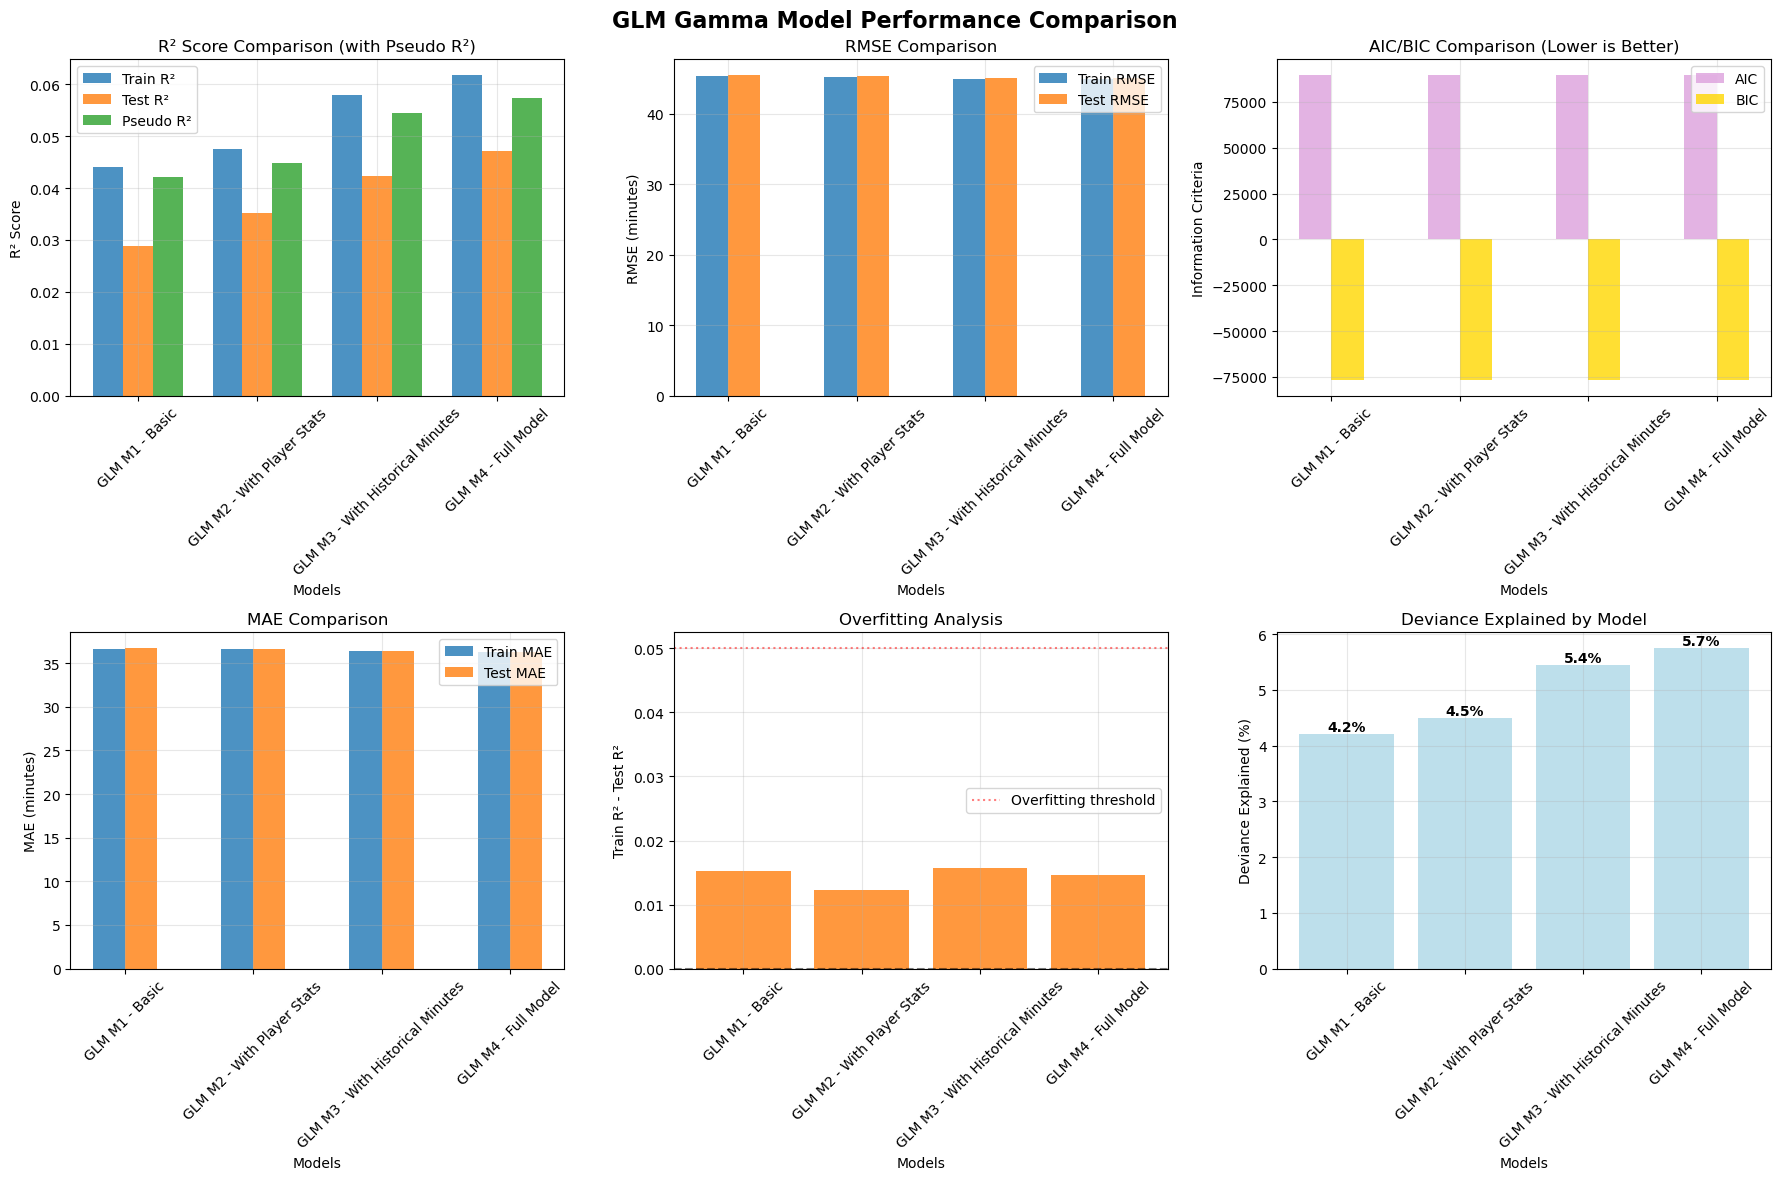


BEST GLM GAMMA MODEL SUMMARY (Based on AIC)
Model: GLM Model 4 - Full Model
Test R²: 0.0472
Pseudo R²: 0.0574
Test RMSE: 44.98 minutes
Test MAE: 36.30 minutes
AIC: 89760.40
BIC: -76845.04
Number of features: 14

Model Summary:
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0109      0.036    138.131      0.000       4.940       5.082
age_diff               0.0001      0.003      0.038      0.970      -0.006       0.007
round_group_QF         0.0050      0.038      0.133      0.894      -0.069       0.079
round_group_SF         0.0168      0.041      0.407      0.684      -0.064       0.098
round_group_Other     -0.0159      0.036     -0.440      0.660      -0.087       0.055
surface_Grass         -0.0584      0.009     -6.187      0.000      -0.077      -0.040
surface_Hard          -0.0118      0.008     -1.428      0.153      -0.028  

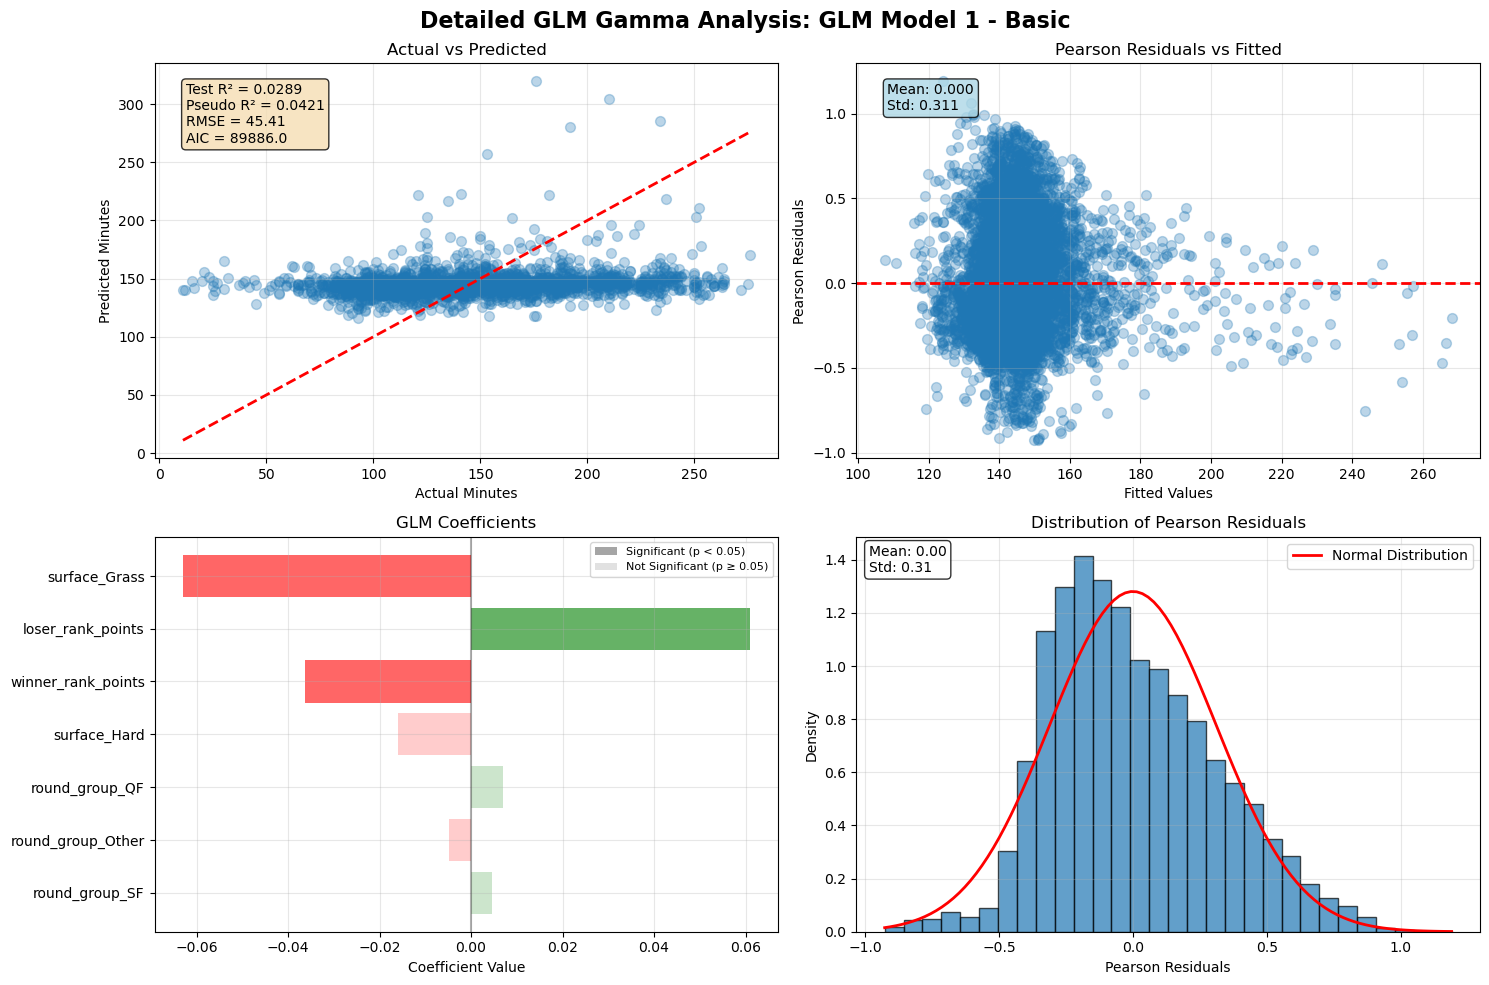


📊 GLM Model 1 - Basic Summary:
   • Test R²: 0.0289
   • Pseudo R² (McFadden): 0.0421
   • Test RMSE: 45.41 minutes
   • Test MAE: 36.70 minutes
   • AIC: 89885.97
   • BIC: -76894.00
   • Number of features: 7
   • Significant coefficients (p < 0.05):
     - loser_rank_points: increases duration (coef=0.0609, p=0.0000)
     - winner_rank_points: decreases duration (coef=-0.0363, p=0.0000)
     - surface_Grass: decreases duration (coef=-0.0630, p=0.0000)
   • Deviance explained: 4.2%
   ✅ Low overfitting: 0.0152
------------------------------------------------------------

Generating detailed analysis for: GLM Model 2 - With Player Stats


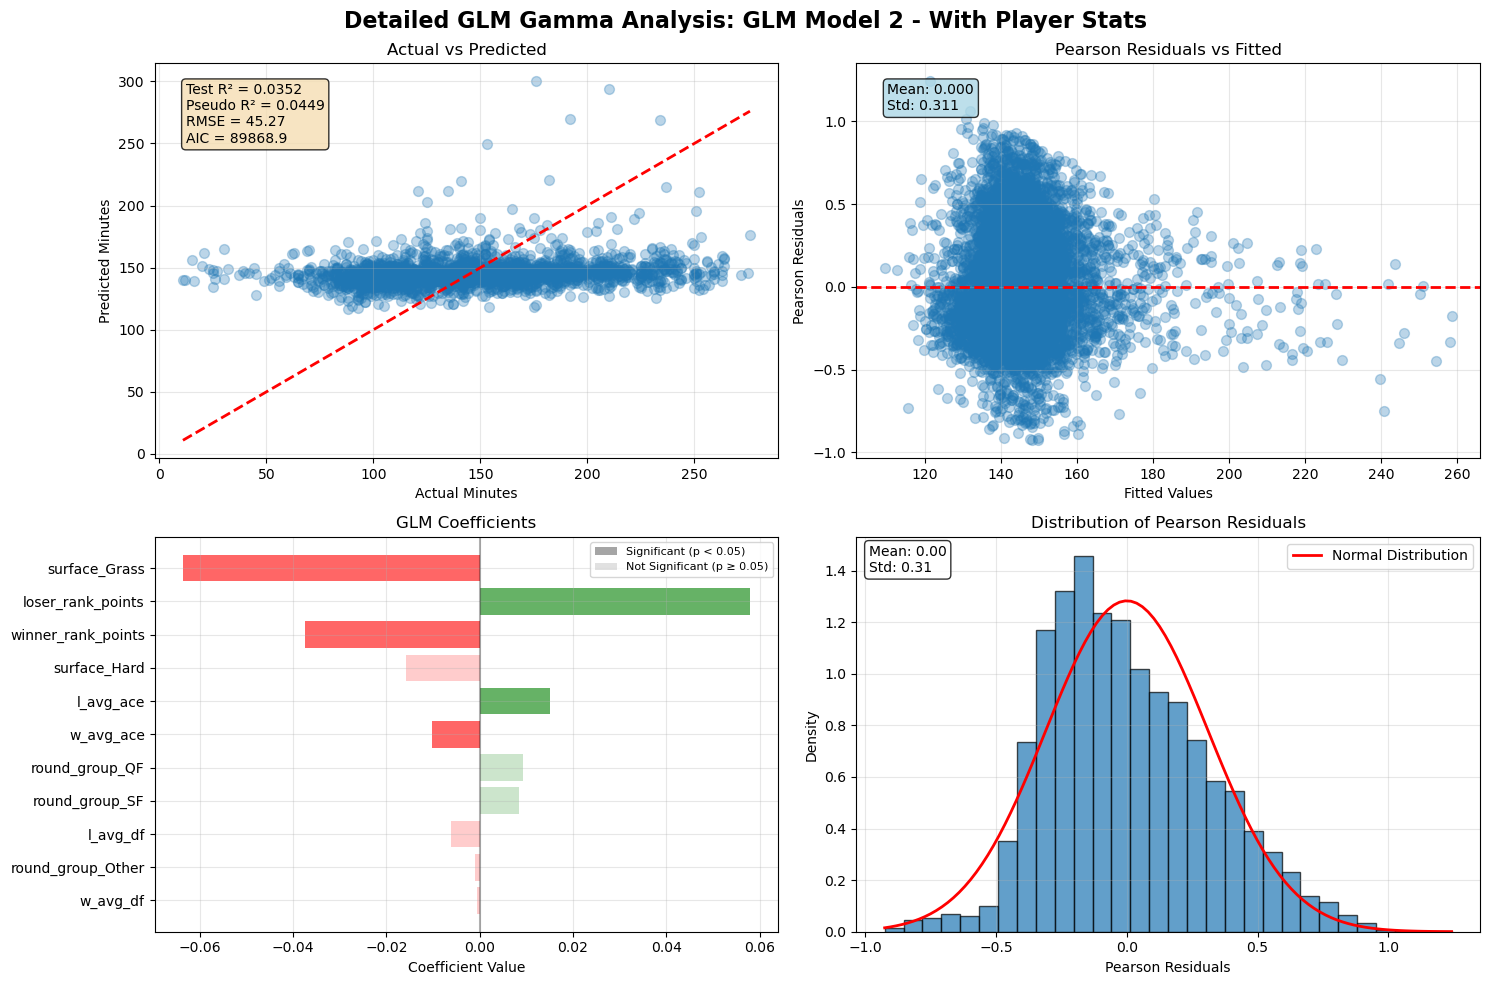


📊 GLM Model 2 - With Player Stats Summary:
   • Test R²: 0.0352
   • Pseudo R² (McFadden): 0.0449
   • Test RMSE: 45.27 minutes
   • Test MAE: 36.64 minutes
   • AIC: 89868.88
   • BIC: -76860.36
   • Number of features: 11
   • Significant coefficients (p < 0.05):
     - loser_rank_points: increases duration (coef=0.0579, p=0.0000)
     - winner_rank_points: decreases duration (coef=-0.0374, p=0.0000)
     - surface_Grass: decreases duration (coef=-0.0636, p=0.0000)
     - l_avg_ace: increases duration (coef=0.0151, p=0.0000)
     - w_avg_ace: decreases duration (coef=-0.0101, p=0.0034)
   • Deviance explained: 4.5%
   ✅ Low overfitting: 0.0123
------------------------------------------------------------

Generating detailed analysis for: GLM Model 3 - With Historical Minutes


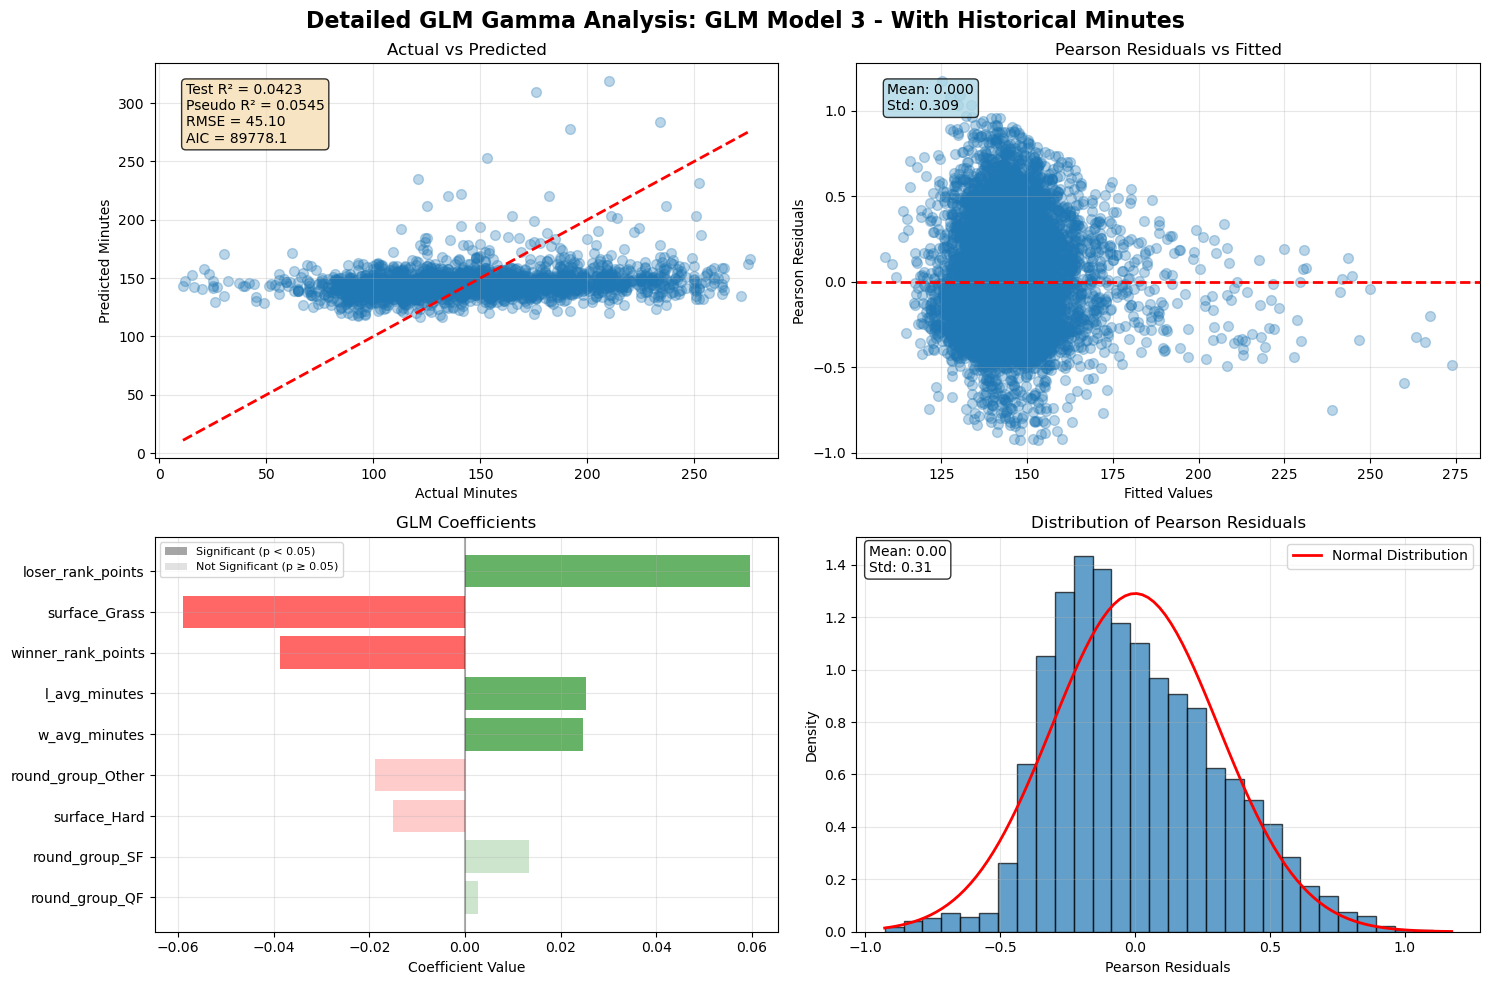


📊 GLM Model 3 - With Historical Minutes Summary:
   • Test R²: 0.0423
   • Pseudo R² (McFadden): 0.0545
   • Test RMSE: 45.10 minutes
   • Test MAE: 36.38 minutes
   • AIC: 89778.08
   • BIC: -76887.53
   • Number of features: 9
   • Significant coefficients (p < 0.05):
     - loser_rank_points: increases duration (coef=0.0596, p=0.0000)
     - winner_rank_points: decreases duration (coef=-0.0387, p=0.0000)
     - l_avg_minutes: increases duration (coef=0.0254, p=0.0000)
     - w_avg_minutes: increases duration (coef=0.0247, p=0.0000)
     - surface_Grass: decreases duration (coef=-0.0590, p=0.0000)
   • Deviance explained: 5.4%
   ✅ Low overfitting: 0.0157
------------------------------------------------------------

Generating detailed analysis for: GLM Model 4 - Full Model


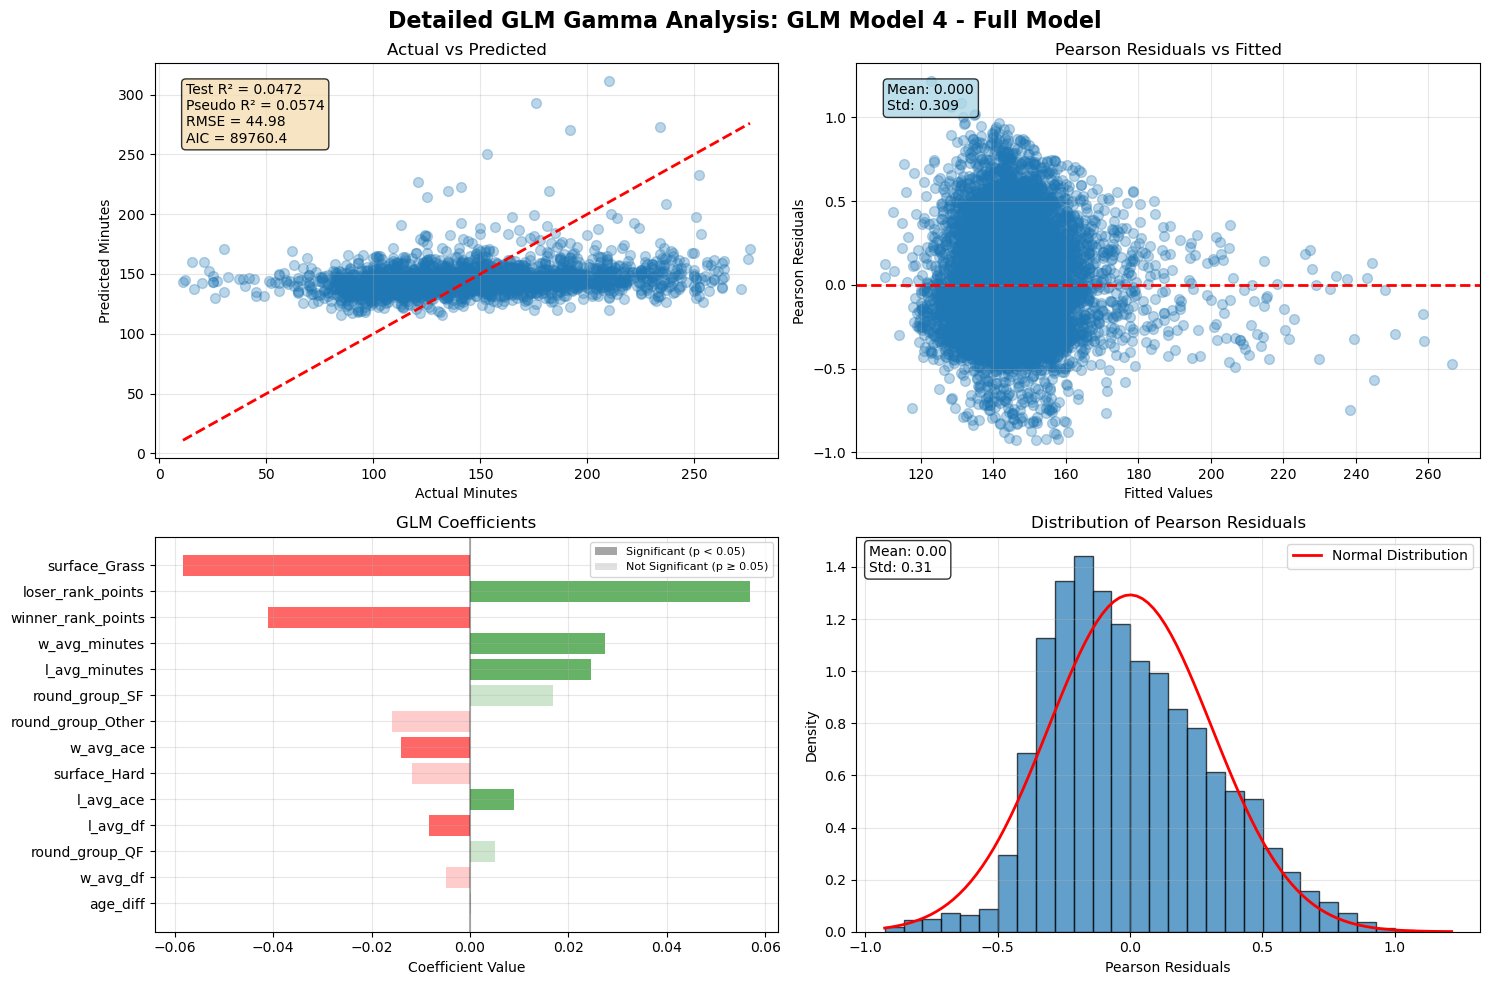


📊 GLM Model 4 - Full Model Summary:
   • Test R²: 0.0472
   • Pseudo R² (McFadden): 0.0574
   • Test RMSE: 44.98 minutes
   • Test MAE: 36.30 minutes
   • AIC: 89760.40
   • BIC: -76845.04
   • Number of features: 14
   • Significant coefficients (p < 0.05):
     - loser_rank_points: increases duration (coef=0.0569, p=0.0000)
     - winner_rank_points: decreases duration (coef=-0.0410, p=0.0000)
     - w_avg_minutes: increases duration (coef=0.0275, p=0.0000)
     - l_avg_minutes: increases duration (coef=0.0246, p=0.0000)
     - surface_Grass: decreases duration (coef=-0.0584, p=0.0000)
     - w_avg_ace: decreases duration (coef=-0.0140, p=0.0000)
     - l_avg_ace: increases duration (coef=0.0089, p=0.0119)
     - l_avg_df: decreases duration (coef=-0.0083, p=0.0202)
   • Deviance explained: 5.7%
   ✅ Low overfitting: 0.0146
------------------------------------------------------------


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.genmod.families import Gamma
from statsmodels.stats.diagnostic import het_white
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
#sns.set_palette("husl")

def create_glm_gamma_models(df):
    """
    Create and compare multiple GLM Gamma regression models
    """
    
    # Define different feature sets
    models = {
        'GLM Model 1 - Basic': ['round_group_QF', 'round_group_SF', 'round_group_Other', 
                                'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points'],
        
        'GLM Model 2 - With Player Stats': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                           'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                           'loser_rank_points', 'w_avg_ace', 'w_avg_df', 'l_avg_ace', 'l_avg_df'],
        
        'GLM Model 3 - With Historical Minutes': ['round_group_QF', 'round_group_SF', 'round_group_Other',
                                                 'surface_Grass', 'surface_Hard', 'winner_rank_points', 
                                                 'loser_rank_points', 'w_avg_minutes', 'l_avg_minutes'],
        
        'GLM Model 4 - Full Model': ['age_diff', 'round_group_QF', 'round_group_SF', 'round_group_Other',
                                     'surface_Grass', 'surface_Hard', 'winner_rank_points', 'loser_rank_points',
                                     'w_avg_ace', 'w_avg_df', 'w_avg_minutes', 'l_avg_ace', 'l_avg_df', 'l_avg_minutes']
    }
    
    # Target variable
    y = df['minutes']
    
    # Store results
    results = {}
    trained_models = {}
    test_data = {}
    scalers = {}  # Store scalers for each model
    
    print("=== GLM GAMMA REGRESSION MODELS COMPARISON ===\n")
    
    for model_name, features in models.items():
        print(f"\n--- {model_name} ---")
        print(f"Features: {len(features)}")
        
        # Prepare data for this specific model
        X = df[features].copy()
        X_train, X_test, y_train_model, y_test_model = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scale continuous variables (rank points and averages) for better GLM convergence
        scaler = StandardScaler()
        continuous_vars = ['winner_rank_points', 'loser_rank_points']
        if 'w_avg_ace' in features:
            continuous_vars.extend(['w_avg_ace', 'w_avg_df', 'l_avg_ace', 'l_avg_df'])
        if 'w_avg_minutes' in features:
            continuous_vars.extend(['w_avg_minutes', 'l_avg_minutes'])
        if 'age_diff' in features:
            continuous_vars.append('age_diff')
        
        # Apply scaling only to continuous variables present in this model
        continuous_vars_present = [var for var in continuous_vars if var in X_train.columns]
        
        if continuous_vars_present:
            X_train_scaled = X_train.copy()
            X_test_scaled = X_test.copy()
            X_train_scaled[continuous_vars_present] = scaler.fit_transform(X_train[continuous_vars_present])
            X_test_scaled[continuous_vars_present] = scaler.transform(X_test[continuous_vars_present])
        else:
            X_train_scaled = X_train.copy()
            X_test_scaled = X_test.copy()
        
        # Add intercept for GLM
        X_train_with_intercept = sm.add_constant(X_train_scaled)
        X_test_with_intercept = sm.add_constant(X_test_scaled)
        
        # Store test data and scaler for later use
        test_data[model_name] = {
            'X_test': X_test_with_intercept, 
            'y_test': y_test_model,
            'X_test_original': X_test,
            'feature_names': ['const'] + list(features)
        }
        scalers[model_name] = scaler
        
        # Create and train GLM Gamma model
        try:
            # Use Gamma family with log link (canonical link for Gamma)
            model = sm.GLM(y_train_model, X_train_with_intercept, 
                          family=Gamma(link=sm.families.links.log()))
            fitted_model = model.fit()
            
            # Predictions (need to handle potential numerical issues)
            try:
                y_pred_train = fitted_model.predict(X_train_with_intercept)
                y_pred_test = fitted_model.predict(X_test_with_intercept)
                
                # Ensure predictions are positive (Gamma requirement)
                y_pred_train = np.maximum(y_pred_train, 0.1)
                y_pred_test = np.maximum(y_pred_test, 0.1)
                
            except Exception as e:
                print(f"Warning: Prediction error for {model_name}: {e}")
                # Fallback to simple predictions
                y_pred_train = np.full(len(y_train_model), y_train_model.mean())
                y_pred_test = np.full(len(y_test_model), y_train_model.mean())
            
            # Metrics
            train_r2 = r2_score(y_train_model, y_pred_train)
            test_r2 = r2_score(y_test_model, y_pred_test)
            train_rmse = np.sqrt(mean_squared_error(y_train_model, y_pred_train))
            test_rmse = np.sqrt(mean_squared_error(y_test_model, y_pred_test))
            train_mae = mean_absolute_error(y_train_model, y_pred_train)
            test_mae = mean_absolute_error(y_test_model, y_pred_test)
            
            # GLM-specific metrics
            aic = fitted_model.aic
            bic = fitted_model.bic
            deviance = fitted_model.deviance
            null_deviance = fitted_model.null_deviance
            pseudo_r2 = 1 - (deviance / null_deviance)  # McFadden's pseudo R²
            
            # Get coefficients and p-values
            coefficients = fitted_model.params
            p_values = fitted_model.pvalues
            
            # Store results
            results[model_name] = {
                'train_r2': train_r2,
                'test_r2': test_r2,
                'pseudo_r2': pseudo_r2,
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'train_mae': train_mae,
                'test_mae': test_mae,
                'aic': aic,
                'bic': bic,
                'deviance': deviance,
                'null_deviance': null_deviance,
                'features': features,
                'coefficients': coefficients,
                'p_values': p_values,
                'feature_names': ['const'] + list(features),
                'fitted_model': fitted_model
            }
            
            trained_models[model_name] = fitted_model
            
            print(f"Train R²: {train_r2:.4f}")
            print(f"Test R²: {test_r2:.4f}")
            print(f"Pseudo R²: {pseudo_r2:.4f}")
            print(f"Train RMSE: {train_rmse:.2f}")
            print(f"Test RMSE: {test_rmse:.2f}")
            print(f"Train MAE: {train_mae:.2f}")
            print(f"Test MAE: {test_mae:.2f}")
            print(f"AIC: {aic:.2f}")
            print(f"BIC: {bic:.2f}")
            
        except Exception as e:
            print(f"Error fitting {model_name}: {e}")
            # Store dummy results in case of failure
            results[model_name] = {
                'train_r2': 0, 'test_r2': 0, 'pseudo_r2': 0,
                'train_rmse': float('inf'), 'test_rmse': float('inf'),
                'train_mae': float('inf'), 'test_mae': float('inf'),
                'aic': float('inf'), 'bic': float('inf'),
                'deviance': 0, 'null_deviance': 0,
                'features': features, 'coefficients': None,
                'p_values': None, 'feature_names': ['const'] + list(features),
                'fitted_model': None
            }
    
    return results, trained_models, test_data, scalers

def plot_glm_gamma_model_comparison(results):
    """
    Create comparison plots for all GLM Gamma models
    """
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('GLM Gamma Model Performance Comparison', fontsize=16, fontweight='bold')
    
    models = list(results.keys())
    
    # R² comparison (including Pseudo R²)
    train_r2 = [results[model]['train_r2'] for model in models]
    test_r2 = [results[model]['test_r2'] for model in models]
    pseudo_r2 = [results[model]['pseudo_r2'] for model in models]
    
    x = np.arange(len(models))
    width = 0.25
    
    axes[0,0].bar(x - width, train_r2, width, label='Train R²', alpha=0.8, color='C0')
    axes[0,0].bar(x, test_r2, width, label='Test R²', alpha=0.8, color='C1')
    axes[0,0].bar(x + width, pseudo_r2, width, label='Pseudo R²', alpha=0.8, color='C2')
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_title('R² Score Comparison (with Pseudo R²)')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels([m.replace('GLM Model ', 'GLM M') for m in models], rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # RMSE comparison
    train_rmse = [results[model]['train_rmse'] for model in models]
    test_rmse = [results[model]['test_rmse'] for model in models]
    
    axes[0,1].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8, color='C0')
    axes[0,1].bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8, color='C1')
    axes[0,1].set_xlabel('Models')
    axes[0,1].set_ylabel('RMSE (minutes)')
    axes[0,1].set_title('RMSE Comparison')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels([m.replace('GLM Model ', 'GLM M') for m in models], rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Information Criteria (AIC/BIC)
    aic_values = [results[model]['aic'] for model in models if results[model]['aic'] != float('inf')]
    bic_values = [results[model]['bic'] for model in models if results[model]['bic'] != float('inf')]
    valid_models = [m for m in models if results[m]['aic'] != float('inf')]
    
    if aic_values and bic_values:
        x_valid = np.arange(len(valid_models))
        axes[0,2].bar(x_valid - width/2, aic_values, width, label='AIC', alpha=0.8, color='plum')
        axes[0,2].bar(x_valid + width/2, bic_values, width, label='BIC', alpha=0.8, color='gold')
        axes[0,2].set_xlabel('Models')
        axes[0,2].set_ylabel('Information Criteria')
        axes[0,2].set_title('AIC/BIC Comparison (Lower is Better)')
        axes[0,2].set_xticks(x_valid)
        axes[0,2].set_xticklabels([m.replace('GLM Model ', 'GLM M') for m in valid_models], rotation=45)
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)
    
    # MAE comparison
    train_mae = [results[model]['train_mae'] for model in models]
    test_mae = [results[model]['test_mae'] for model in models]
    
    axes[1,0].bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.8, color='C0')
    axes[1,0].bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.8, color='C1')
    axes[1,0].set_xlabel('Models')
    axes[1,0].set_ylabel('MAE (minutes)')
    axes[1,0].set_title('MAE Comparison')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels([m.replace('GLM Model ', 'GLM M') for m in models], rotation=45)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Overfitting analysis
    overfitting = [results[model]['train_r2'] - results[model]['test_r2'] for model in models]
    
    colors = ['red' if x > 0.05 else 'green' if x < 0 else 'orange' for x in overfitting]
    axes[1,1].bar(range(len(models)), overfitting, alpha=0.8, color='C1')
    axes[1,1].set_xlabel('Models')
    axes[1,1].set_ylabel('Train R² - Test R²')
    axes[1,1].set_title('Overfitting Analysis')
    axes[1,1].set_xticks(range(len(models)))
    axes[1,1].set_xticklabels([m.replace('GLM Model ', 'GLM M') for m in models], rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1,1].axhline(y=0.05, color='red', linestyle=':', alpha=0.5, label='Overfitting threshold')
    axes[1,1].legend()
    
    # Deviance Explained
    deviance_explained = []
    for model in models:
        if results[model]['null_deviance'] > 0:
            dev_exp = (1 - results[model]['deviance'] / results[model]['null_deviance']) * 100
            deviance_explained.append(dev_exp)
        else:
            deviance_explained.append(0)
    
    bars = axes[1,2].bar(models, deviance_explained, alpha=0.8, color='lightblue')
    axes[1,2].set_xlabel('Models')
    axes[1,2].set_ylabel('Deviance Explained (%)')
    axes[1,2].set_title('Deviance Explained by Model')
    axes[1,2].set_xticklabels([m.replace('GLM Model ', 'GLM M') for m in models], rotation=45)
    axes[1,2].grid(True, alpha=0.3)
    
    # Add percentage labels on bars
    for bar, pct in zip(bars, deviance_explained):
        if pct > 0:
            axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.25,
                          f'{pct:.1f}%', ha='center', va='top', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_detailed_glm_gamma_analysis(model_name, results, trained_models, test_data, df):
    """
    Detailed analysis of a specific GLM Gamma model
    """
    
    model = trained_models[model_name]
    model_results = results[model_name]
    
    if model is None:
        print(f"Model {model_name} failed to fit properly. Skipping detailed analysis.")
        return
    
    # Get the correct test data for this model
    X_test = test_data[model_name]['X_test']
    y_test = test_data[model_name]['y_test']
    feature_names = test_data[model_name]['feature_names']
    
    # Predictions
    try:
        y_pred = model.predict(X_test)
        y_pred = np.maximum(y_pred, 0.1)  # Ensure positive predictions
    except:
        y_pred = np.full(len(y_test), y_test.mean())
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Detailed GLM Gamma Analysis: {model_name}', fontsize=16, fontweight='bold')
    
    # Actual vs Predicted
    axes[0,0].scatter(y_test, y_pred, alpha=0.3, color='C0', s=50)
    axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual Minutes')
    axes[0,0].set_ylabel('Predicted Minutes')
    axes[0,0].set_title('Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add metrics to the plot
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pseudo_r2 = model_results['pseudo_r2']
    aic = model_results['aic']
    axes[0,0].text(0.05, 0.95, f'Test R² = {r2:.4f}\nPseudo R² = {pseudo_r2:.4f}\nRMSE = {rmse:.2f}\nAIC = {aic:.1f}', 
                   transform=axes[0,0].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # Residuals (Pearson residuals for GLM)
    try:
        pearson_residuals = model.resid_pearson
        fitted_values = model.fittedvalues
    except:
        residuals = y_test - y_pred
        pearson_residuals = residuals / np.sqrt(np.var(residuals))
        fitted_values = y_pred
    
    axes[0,1].scatter(fitted_values, pearson_residuals, alpha=0.3, color='C0', s=50)
    axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Fitted Values')
    axes[0,1].set_ylabel('Pearson Residuals')
    axes[0,1].set_title('Pearson Residuals vs Fitted')
    axes[0,1].grid(True, alpha=0.3)
    
    # Add residual statistics
    res_mean, res_std = np.mean(pearson_residuals), np.std(pearson_residuals)
    axes[0,1].text(0.05, 0.95, f'Mean: {res_mean:.3f}\nStd: {res_std:.3f}', 
                   transform=axes[0,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    
    # Coefficients and significance
        # Coefficients and significance
# Coefficients and significance
    if model_results['coefficients'] is not None and model_results['p_values'] is not None:
        feature_names = model_results.get('feature_names', [])
        if not feature_names and hasattr(model_results['coefficients'], 'index'):
            feature_names = model_results['coefficients'].index.tolist()
        elif not feature_names and isinstance(model_results['coefficients'], dict):
            feature_names = list(model_results['coefficients'].keys())
        elif not feature_names:
            feature_names = [f'Feature_{i}' for i in range(len(model_results['coefficients']))]

        if len(feature_names) != len(model_results['coefficients']):
            if 'const' in model_results['p_values'] and len(feature_names) == len(model_results['coefficients']) -1:
                pass
            else:
                print("Advertencia: La longitud de feature_names no coincide con la de los coeficientes/p_values.")
                feature_names = [f'Feature_{i}' for i in range(len(model_results['coefficients']))]

        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': model_results['coefficients'],
            'P_Value': model_results['p_values']
        })

        is_const_present_in_coef = 'const' in coef_df['Feature'].values
        if not is_const_present_in_coef and 'const' in model_results['p_values'] and len(coef_df[coef_df['P_Value'] == model_results['p_values']['const']]) > 0 :
            pass

        if 'const' in coef_df['Feature'].values:
            coef_df_no_intercept = coef_df[coef_df['Feature'] != 'const'].copy()
        else:
            coef_df_no_intercept = coef_df.copy()

        coef_df_no_intercept = coef_df_no_intercept.sort_values(by='Coefficient', key=abs, ascending=True)

        colors = []
        alphas = []

        for index, row in coef_df_no_intercept.iterrows():
            if row['Coefficient'] > 0:
                colors.append('green')
            elif row['Coefficient'] < 0:
                colors.append('red')
            else:
                colors.append('gray')

            if row['P_Value'] < 0.05:
                alphas.append(0.6)
            else:
                alphas.append(0.2)

        for i in range(len(coef_df_no_intercept)):
            axes[1,0].barh(
                coef_df_no_intercept['Feature'].iloc[i],
                coef_df_no_intercept['Coefficient'].iloc[i],
                color=colors[i],
                alpha=alphas[i]
            )

        axes[1,0].set_xlabel('Coefficient Value')
        axes[1,0].set_title('GLM Coefficients')
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)


        legend_elements_simple = [
            Patch(facecolor='dimgray', alpha=0.6, label='Significant (p < 0.05)'),
            Patch(facecolor='dimgray', alpha=0.2, label='Not Significant (p ≥ 0.05)'),
        ]
        axes[1,0].legend(handles=legend_elements_simple, loc='best', fontsize=8)
    
    # Distribution of Pearson residuals
    axes[1,1].hist(pearson_residuals, bins=30, alpha=0.7, edgecolor='black', color='C0', density=True)
    axes[1,1].set_xlabel('Pearson Residuals')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Distribution of Pearson Residuals')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add normal distribution overlay
    mu, sigma = np.mean(pearson_residuals), np.std(pearson_residuals)
    x = np.linspace(pearson_residuals.min(), pearson_residuals.max(), 100)
    normal_dist = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    axes[1,1].plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
    axes[1,1].legend()
    
    # Add normality test info
    axes[1,1].text(0.02, 0.98, f'Mean: {mu:.2f}\nStd: {sigma:.2f}', 
                   transform=axes[1,1].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_all_glm_gamma_models_analysis(results, trained_models, test_data, df):
    """
    Show detailed analysis for all GLM Gamma models
    """
    print("\n" + "="*70)
    print("DETAILED GLM GAMMA ANALYSIS FOR ALL MODELS")
    print("="*70)
    
    for model_name in results.keys():
        print(f"\nGenerating detailed analysis for: {model_name}")
        plot_detailed_glm_gamma_analysis(model_name, results, trained_models, test_data, df)
        
        # Print model summary
        model_results = results[model_name]
        print(f"\n📊 {model_name} Summary:")
        print(f"   • Test R²: {model_results['test_r2']:.4f}")
        print(f"   • Pseudo R² (McFadden): {model_results['pseudo_r2']:.4f}")
        print(f"   • Test RMSE: {model_results['test_rmse']:.2f} minutes")
        print(f"   • Test MAE: {model_results['test_mae']:.2f} minutes")
        print(f"   • AIC: {model_results['aic']:.2f}")
        print(f"   • BIC: {model_results['bic']:.2f}")
        print(f"   • Number of features: {len(model_results['features'])}")
        
        # Show significant coefficients
        if model_results['coefficients'] is not None and model_results['p_values'] is not None:
            coef_df = pd.DataFrame({
                'Feature': model_results['feature_names'],
                'Coefficient': model_results['coefficients'],
                'P_Value': model_results['p_values']
            })
            
            # Filter significant coefficients (excluding intercept)
            significant_coefs = coef_df[(coef_df['P_Value'] < 0.05) & (coef_df['Feature'] != 'const')]
            
            if len(significant_coefs) > 0:
                print(f"   • Significant coefficients (p < 0.05):")
                for _, row in significant_coefs.sort_values('P_Value').iterrows():
                    effect = "increases" if row['Coefficient'] > 0 else "decreases"
                    print(f"     - {row['Feature']}: {effect} duration (coef={row['Coefficient']:.4f}, p={row['P_Value']:.4f})")
            else:
                print(f"   • No significant coefficients at p < 0.05 level")
        
        # Model quality assessment
        deviance_explained = (1 - model_results['deviance'] / model_results['null_deviance']) * 100 if model_results['null_deviance'] > 0 else 0
        print(f"   • Deviance explained: {deviance_explained:.1f}%")
        
        # Overfitting check
        overfitting_score = model_results['train_r2'] - model_results['test_r2']
        if overfitting_score > 0.05:
            print(f"   ⚠️  High overfitting detected: {overfitting_score:.4f}")
        elif overfitting_score < 0:
            print(f"   ✅ No overfitting (model generalizes well): {overfitting_score:.4f}")
        else:
            print(f"   ✅ Low overfitting: {overfitting_score:.4f}")
            
        print("-" * 60)

def print_best_glm_gamma_model_summary(results):
    """
    Print summary of the best GLM Gamma model
    """
    
    # Find best model based on AIC (lower is better for GLM)
    valid_models = {k: v for k, v in results.items() if v['aic'] != float('inf')}
    
    if not valid_models:
        print("No valid models found.")
        return None
    
    best_model = min(valid_models.items(), key=lambda x: x[1]['aic'])
    best_name, best_metrics = best_model
    
    print("\n" + "="*60)
    print("BEST GLM GAMMA MODEL SUMMARY (Based on AIC)")
    print("="*60)
    print(f"Model: {best_name}")
    print(f"Test R²: {best_metrics['test_r2']:.4f}")
    print(f"Pseudo R²: {best_metrics['pseudo_r2']:.4f}")
    print(f"Test RMSE: {best_metrics['test_rmse']:.2f} minutes")
    print(f"Test MAE: {best_metrics['test_mae']:.2f} minutes")
    print(f"AIC: {best_metrics['aic']:.2f}")
    print(f"BIC: {best_metrics['bic']:.2f}")
    print(f"Number of features: {len(best_metrics['features'])}")
    
    # Show model summary
    if best_metrics['fitted_model'] is not None:
        print(f"\nModel Summary:")
        print(best_metrics['fitted_model'].summary().tables[1])
    
    return best_name

def run_complete_glm_gamma_analysis(df):
    """
    Run the complete GLM Gamma regression analysis
    """
    
    print("Starting Tennis Match Duration GLM Gamma Analysis...")
    print(f"Dataset shape: {df.shape}")
    print(f"Target variable (minutes) - Mean: {df['minutes'].mean():.2f}, Std: {df['minutes'].std():.2f}")
    print("Note: Using Gamma distribution with log link for positive continuous data")
    
    # Run all GLM Gamma models
    results, trained_models, test_data, scalers = create_glm_gamma_models(df)
    
    # Plot comparison
    plot_glm_gamma_model_comparison(results)
    
    # Find and print best model summary
    best_model_name = print_best_glm_gamma_model_summary(results)
    
    # Detailed analysis of ALL models
    plot_all_glm_gamma_models_analysis(results, trained_models, test_data, df)
    
    return results, trained_models

# Example usage:
print("📊 GLM Gamma Analysis Code is ready!")
print("To run the complete analysis, use:")
print("glm_results, glm_models = run_complete_glm_gamma_analysis(df_clean)")
print("\n🔍 GLM Gamma Key Features:")
print("• Gamma distribution for positive continuous data (duration)")
print("• Log link function (canonical for Gamma)")
print("• AIC/BIC for model selection")
print("• Pseudo R² (McFadden)")
print("• Pearson residuals analysis")
print("• Statistical significance testing")
print("• Deviance explained metrics")
glm_results, glm_models = run_complete_glm_gamma_analysis(df_clean)